# MIS 583 A7 Semantic Segmentation on BCSS

Before we start, please put your name and SID in following format: <br>
: LASTNAME Firstname, ?00000000   //   e.g.) 李晨愷 M114020035

**Your Answer:**    
Hi I'm 陳昱逢, B092040016.

## Overview

- Semantic segmentation is a computer vision task that aims to classify each pixel in an image into specific objects or regions.

- In this assignment, you will implement a segmentor to classify the specific types of breast cancer lesions.

- The segmentor implemented in this assignment is U-Net, and you are required to construct it from scratch


## Kaggle Competition
Kaggle is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish datasets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.

This assignment use kaggle to calculate your grade.  
Please use this [**LINK**](https://www.kaggle.com/t/13040d09b42940ba90f96cca324ee90d) to join the competition.

## Google Colab Setup
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## How to Get Data

請先到共用雲端硬碟將檔案 `BCSS.zip`，建立捷徑到自己的雲端硬碟中。

> 操作步驟
1. 點開雲端[連結](https://drive.google.com/file/d/1uW9SInf6jrF5YUCjf-2ObxLolYYEb2Np/view?usp=sharing)
2. 點選右上角「新增雲端硬碟捷徑」
3. 點選「我的雲端硬碟」
4. 點選「新增捷徑」

完成以上流程會在你的雲端硬碟中建立一個檔案的捷徑，接著我們在colab中取得權限即可使用。

## Unzip Data

解壓縮 `BCSS.zip` 

+ `train` : 包含了train的所有圖片
+ `val` : 包含了val的所有圖片
+ `test` : 包含了test的所有圖片
+ `train_mask` : 包含了train的所有mask
+ `val_mask` : 包含了val所有mask
+ `test_mask` : 包含了test的所有mask


其中`train`的圖片 30760 張，`val`的圖片 5429 張，`test` 的圖片 4021 張。

注意: 若有另外設定存放在雲端硬碟中的路徑，請記得本處路徑也須做更動。

In [ ]:
#!unzip -qq ./drive/MyDrive/BCSS.zip
!pip install gdown
!gdown 'https://drive.google.com/uc?id=1uW9SInf6jrF5YUCjf-2ObxLolYYEb2Np' -O BCSS.zip
!unzip BCSS.zip

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Downloading...
From (uriginal): https://drive.google.com/uc?id=1uW9SInf6jrF5YUCjf-2ObxLolYYEb2Np
From (redirected): https://drive.google.com/uc?id=1uW9SInf6jrF5YUCjf-2ObxLolYYEb2Np&confirm=t&uuid=045b8444-3b54-4996-9422-91b5154a1d3b
To: /home/u5536645/BCSS.zip
100%|███████████████████████████████████████| 3.90G/3.90G [00:26<00:00, 150MB/s]
Archive:  BCSS.zip
   creating: test/
  inflating: test/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2464_1792_size224.png  
  inflating: test/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_3136_0_size224.png  
  inflating: test/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_0_6048_size224.png  
  inflating: test/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_224_1344_size224.png  
  inflating: test/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_672_1792_size224.png  
  inflating: test/TC

  inflating: test/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_448_1792_size224.png  
  inflating: test/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2016_448_size224.png  
  inflating: test/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_3136_1120_size224.png  
  inflating: test/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_448_2912_size224.png  
  inflating: test/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2912_4928_size224.png  
  inflating: test/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2240_6944_size224.png  
  inflating: test/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_4480_2240_size224.png  
  inflating: test/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_2464_0_size224.png  
  inflating: test/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2688_224_size224.png  
  inflating: test/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2464_3360_size224.png  
  inflating: test/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2688_2016_size224.png  
  inflating: test/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1792_3136_

  inflating: test/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_1792_672_size224.png  
  inflating: test/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_3360_1568_size224.png  
  inflating: test/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_672_1568_size224.png  
  inflating: test/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2688_3136_size224.png  
  inflating: test/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_1344_448_size224.png  
  inflating: test/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_224_4032_size224.png  
  inflating: test/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2912_2912_size224.png  
  inflating: test/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_896_896_size224.png  
  inflating: test/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_224_672_size224.png  
  inflating: test/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_2240_1792_size224.png  
  inflating: test/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_1120_0_size224.png  
  inflating: test/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_0_3360_size224.png

  inflating: test/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1120_2240_size224.png  
  inflating: test/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1792_0_size224.png  
  inflating: test/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1792_1568_size224.png  
  inflating: test/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_0_672_size224.png  
  inflating: test/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4256_448_size224.png  
  inflating: test/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_672_2240_size224.png  
  inflating: test/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_0_448_size224.png  
  inflating: test/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_0_2016_size224.png  
  inflating: test/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1792_2464_size224.png  
  inflating: test/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1568_8960_size224.png  
  inflating: test/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_3808_2464_size224.png  
  inflating: test/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2464_4032_size224.png

  inflating: test/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2240_4032_size224.png  
  inflating: test/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_672_896_size224.png  
  inflating: test/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1568_5376_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6496_3136_size224.png  
  inflating: test/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2688_1792_size224.png  
  inflating: test/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2688_4256_size224.png  
  inflating: test/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3360_3584_size224.png  
  inflating: test/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_672_5152_size224.png  
  inflating: test/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3360_224_size224.png  
  inflating: test/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2016_672_size224.png  
  inflating: test/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4256_3584_size224.png  
  inflating: test/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2464_2912_si

  inflating: test/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_7840_3808_size224.png  
  inflating: test/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2688_2240_size224.png  
  inflating: test/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_1568_2016_size224.png  
  inflating: test/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_1120_1120_size224.png  
  inflating: test/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_1792_448_size224.png  
  inflating: test/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_896_2464_size224.png  
  inflating: test/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2016_1344_size224.png  
  inflating: test/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_4256_1120_size224.png  
  inflating: test/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1792_1568_size224.png  
  inflating: test/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_672_672_size224.png  
  inflating: test/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3136_2688_size224.png  
  inflating: test/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2912_5152

  inflating: test/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2464_224_size224.png  
  inflating: test/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1344_4032_size224.png  
  inflating: test/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_2016_1344_size224.png  
  inflating: test/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2464_2688_size224.png  
  inflating: test/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1568_3360_size224.png  
  inflating: test/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_0_4256_size224.png  
  inflating: test/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2464_5600_size224.png  
  inflating: test/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3584_672_size224.png  
  inflating: test/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_2016_1792_size224.png  
  inflating: test/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_3360_1568_size224.png  
  inflating: test/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2240_2016_size224.png  
  inflating: test/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_672_2240

  inflating: test/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2240_2688_size224.png  
  inflating: test/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4480_3360_size224.png  
  inflating: test/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2688_1120_size224.png  
  inflating: test/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4928_2240_size224.png  
  inflating: test/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_5600_0_size224.png  
  inflating: test/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2016_896_size224.png  
  inflating: test/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1120_448_size224.png  
  inflating: test/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1120_3360_size224.png  
  inflating: test/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_1568_2016_size224.png  
  inflating: test/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_448_224_size224.png  
  inflating: test/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_448_4032_size224.png  
  inflating: test/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_672_2016_size

  inflating: test/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_448_2688_size224.png  
  inflating: test/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4704_2688_size224.png  
  inflating: test/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_224_2464_size224.png  
  inflating: test/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2688_2240_size224.png  
  inflating: test/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_0_3808_size224.png  
  inflating: test/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2240_5824_size224.png  
  inflating: test/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1568_1344_size224.png  
  inflating: test/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_224_224_size224.png  
  inflating: test/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2688_448_size224.png  
  inflating: test/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2016_1792_size224.png  
  inflating: test/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_4032_3136_size224.png  
  inflating: test/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_0_2240_size

  inflating: test/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2688_448_size224.png  
  inflating: test/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2688_1568_size224.png  
  inflating: test/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_1120_1120_size224.png  
  inflating: test/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_0_2464_size224.png  
  inflating: test/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1120_6048_size224.png  
  inflating: test/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1120_5824_size224.png  
  inflating: test/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_2688_2240_size224.png  
  inflating: test/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3136_4480_size224.png  
  inflating: test/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3136_224_size224.png  
  inflating: test/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2912_6720_size224.png  
  inflating: test/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_3360_2688_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2464_5152

  inflating: test/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1568_3136_size224.png  
  inflating: test/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5600_8736_size224.png  
  inflating: test/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_1792_3360_size224.png  
  inflating: test/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_3808_2464_size224.png  
  inflating: test/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3808_3584_size224.png  
  inflating: test/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1120_5376_size224.png  
  inflating: test/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2912_896_size224.png  
  inflating: test/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1792_1120_size224.png  
  inflating: test/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_1344_1568_size224.png  
  inflating: test/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1792_5824_size224.png  
  inflating: test/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1120_2688_size224.png  
  inflating: test/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_896_1

  inflating: test/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4480_4480_size224.png  
  inflating: test/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2240_224_size224.png  
  inflating: test/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_672_1792_size224.png  
  inflating: test/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2688_1344_size224.png  
  inflating: test/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_1120_2464_size224.png  
  inflating: test/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_448_2912_size224.png  
  inflating: test/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_3808_3136_size224.png  
  inflating: test/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2464_1120_size224.png  
  inflating: test/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_224_1568_size224.png  
  inflating: test/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4928_2240_size224.png  
  inflating: test/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_0_4256_size224.png  
  inflating: test/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1792_448_size

  inflating: test/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2464_896_size224.png  
  inflating: test/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4032_0_size224.png  
  inflating: test/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_896_5376_size224.png  
  inflating: test/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2240_4704_size224.png  
  inflating: test/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_448_1120_size224.png  
  inflating: test/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1120_896_size224.png  
  inflating: test/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3360_3808_size224.png  
  inflating: test/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_2688_1120_size224.png  
  inflating: test/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_2464_448_size224.png  
  inflating: test/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_672_3360_size224.png  
  inflating: test/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_2464_1120_size224.png  
  inflating: test/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2464_2240_size

  inflating: test/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_0_672_size224.png  
  inflating: test/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2240_4928_size224.png  
  inflating: test/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_2240_1792_size224.png  
  inflating: test/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2688_896_size224.png  
  inflating: test/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_1120_672_size224.png  
  inflating: test/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6944_3808_size224.png  
  inflating: test/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1568_6048_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3360_5600_size224.png  
  inflating: test/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_1120_1792_size224.png  
  inflating: test/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2240_3360_size224.png  
  inflating: test/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_1120_2240_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4928_5376

  inflating: test/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6496_4032_size224.png  
  inflating: test/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2912_224_size224.png  
  inflating: test/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_224_2016_size224.png  
  inflating: test/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_224_1344_size224.png  
  inflating: test/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_0_4928_size224.png  
  inflating: test/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1344_1120_size224.png  
  inflating: test/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_448_1568_size224.png  
  inflating: test/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_448_2016_size224.png  
  inflating: test/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3136_2240_size224.png  
  inflating: test/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_448_2912_size224.png  
  inflating: test/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6272_4032_size224.png  
  inflating: test/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_3360_1120_size2

  inflating: test/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_672_5152_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3136_672_size224.png  
  inflating: test/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_672_4032_size224.png  
  inflating: test/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_1792_1568_size224.png  
  inflating: test/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_2688_1120_size224.png  
  inflating: test/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_224_6272_size224.png  
  inflating: test/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_448_3584_size224.png  
  inflating: test/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4032_448_size224.png  
  inflating: test/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1792_3360_size224.png  
  inflating: test/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_1792_448_size224.png  
  inflating: test/TCGA-OL-A5RW-DX1_xmin5772_ymin6839_MPP-0_224_0_size224.png  
  inflating: test/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_1568_448_size224.p

  inflating: test/TCGA-A7-A4SE-DX1_xmin50530_ymin11318_MPP-0_896_224_size224.png  
  inflating: test/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1792_672_size224.png  
  inflating: test/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_224_3808_size224.png  
  inflating: test/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1568_2464_size224.png  
  inflating: test/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2912_4480_size224.png  
  inflating: test/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_448_896_size224.png  
  inflating: test/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1344_3136_size224.png  
  inflating: test/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2464_5376_size224.png  
  inflating: test/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2912_2688_size224.png  
  inflating: test/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3136_3584_size224.png  
  inflating: test/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2688_5152_size224.png  
  inflating: test/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_896_1792_

  inflating: test/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_1120_1568_size224.png  
  inflating: test/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_0_2912_size224.png  
  inflating: test/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3360_1344_size224.png  
  inflating: test/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2688_4928_size224.png  
  inflating: test/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2912_1344_size224.png  
  inflating: test/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_672_2240_size224.png  
  inflating: test/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_448_3584_size224.png  
  inflating: test/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4032_0_size224.png  
  inflating: test/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1344_1120_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4032_5600_size224.png  
  inflating: test/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_1120_4480_size224.png  
  inflating: test/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1568_4480_size

  inflating: test/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_4480_2240_size224.png  
  inflating: test/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4480_896_size224.png  
  inflating: test/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_0_2688_size224.png  
  inflating: test/TCGA-AR-A1AY-DX1_xmin62652_ymin27061_MPP-0_224_672_size224.png  
  inflating: test/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2464_4480_size224.png  
  inflating: test/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_896_2688_size224.png  
  inflating: test/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_448_2912_size224.png  
  inflating: test/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1120_1568_size224.png  
  inflating: test/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_1344_224_size224.png  
  inflating: test/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1568_4032_size224.png  
  inflating: test/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_448_2240_size224.png  
  inflating: test/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_224_672_size2

  inflating: test/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1568_2240_size224.png  
  inflating: test/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_1568_2464_size224.png  
  inflating: test/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_2240_1568_size224.png  
  inflating: test/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_8288_896_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6496_1568_size224.png  
  inflating: test/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2912_6944_size224.png  
  inflating: test/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_1792_2912_size224.png  
  inflating: test/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_7168_3360_size224.png  
  inflating: test/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_2464_1568_size224.png  
  inflating: test/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4032_0_size224.png  
  inflating: test/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_1792_1344_size224.png  
  inflating: test/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_3136_1

  inflating: test/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_0_2016_size224.png  
  inflating: test/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_6272_1792_size224.png  
  inflating: test/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_448_4032_size224.png  
  inflating: test/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2240_1568_size224.png  
  inflating: test/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5600_896_size224.png  
  inflating: test/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1568_672_size224.png  
  inflating: test/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_0_2016_size224.png  
  inflating: test/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_672_2464_size224.png  
  inflating: test/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1344_1792_size224.png  
  inflating: test/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1120_448_size224.png  
  inflating: test/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_224_672_size224.png  
  inflating: test/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4704_2240_size224

  inflating: test/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1344_4032_size224.png  
  inflating: test/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3584_0_size224.png  
  inflating: test/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4928_672_size224.png  
  inflating: test/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_3136_2016_size224.png  
  inflating: test/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2016_448_size224.png  
  inflating: test/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_0_2240_size224.png  
  inflating: test/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2240_224_size224.png  
  inflating: test/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_2016_2240_size224.png  
  inflating: test/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_224_2688_size224.png  
  inflating: test/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1344_3808_size224.png  
  inflating: test/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1120_2688_size224.png  
  inflating: test/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_2016_448_size

  inflating: test/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2016_4480_size224.png  
  inflating: test/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2912_4704_size224.png  
  inflating: test/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4032_1792_size224.png  
  inflating: test/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_1792_2240_size224.png  
  inflating: test/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_1568_2016_size224.png  
  inflating: test/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1792_4032_size224.png  
  inflating: test/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_1568_1344_size224.png  
  inflating: test/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5376_3360_size224.png  
  inflating: test/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1568_1568_size224.png  
  inflating: test/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2240_3136_size224.png  
  inflating: test/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_448_1344_size224.png  
  inflating: test/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_0_134

  inflating: test/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_224_3136_size224.png  
  inflating: test/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3584_7392_size224.png  
  inflating: test/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1120_5600_size224.png  
  inflating: test/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2912_4928_size224.png  
  inflating: test/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1344_3360_size224.png  
  inflating: test/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_896_672_size224.png  
  inflating: test/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3808_2912_size224.png  
  inflating: test/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3136_1344_size224.png  
  inflating: test/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_224_896_size224.png  
  inflating: test/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_1120_1568_size224.png  
  inflating: test/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_896_0_size224.png  
  inflating: test/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_672_2688_size

  inflating: test/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_0_3136_size224.png  
  inflating: test/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_2016_2688_size224.png  
  inflating: test/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2912_1792_size224.png  
  inflating: test/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3360_3584_size224.png  
  inflating: test/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_1344_size224.png  
  inflating: test/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_672_2464_size224.png  
  inflating: test/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_672_672_size224.png  
  inflating: test/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4928_5152_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1120_4480_size224.png  
  inflating: test/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_2016_1792_size224.png  
  inflating: test/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1344_3584_size224.png  
  inflating: test/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_1344_2464_s

  inflating: test/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_448_1568_size224.png  
  inflating: test/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2240_2016_size224.png  
  inflating: test/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2464_1344_size224.png  
  inflating: test/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2016_1120_size224.png  
  inflating: test/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1568_0_size224.png  
  inflating: test/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_5824_3584_size224.png  
  inflating: test/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_2688_1120_size224.png  
  inflating: test/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2240_448_size224.png  
  inflating: test/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_448_1120_size224.png  
  inflating: test/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_1792_1792_size224.png  
  inflating: test/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_1120_448_size224.png  
  inflating: test/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2912_1120_

  inflating: test/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_672_672_size224.png  
  inflating: test/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2688_1568_size224.png  
  inflating: test/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_1568_2464_size224.png  
  inflating: test/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1344_896_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6496_2912_size224.png  
  inflating: test/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4480_3584_size224.png  
  inflating: test/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_1792_2464_size224.png  
  inflating: test/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_2240_2240_size224.png  
  inflating: test/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_448_3360_size224.png  
  inflating: test/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2912_896_size224.png  
  inflating: test/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_448_2912_size224.png  
  inflating: test/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_3136_3584

  inflating: test/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1344_3808_size224.png  
  inflating: test/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1568_1792_size224.png  
  inflating: test/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_1568_1792_size224.png  
  inflating: test/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_896_5376_size224.png  
  inflating: test/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_1344_2016_size224.png  
  inflating: test/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2016_3136_size224.png  
  inflating: test/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_896_672_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_448_672_size224.png  
  inflating: test/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_3584_1792_size224.png  
  inflating: test/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_672_1344_size224.png  
  inflating: test/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1344_1568_size224.png  
  inflating: test/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_1344_2464_s

  inflating: test/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3360_2912_size224.png  
  inflating: test/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_448_1344_size224.png  
  inflating: test/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_1792_1344_size224.png  
  inflating: test/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1120_4032_size224.png  
  inflating: test/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_5152_2912_size224.png  
  inflating: test/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1792_4256_size224.png  
  inflating: test/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_448_2240_size224.png  
  inflating: test/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3584_896_size224.png  
  inflating: test/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_448_672_size224.png  
  inflating: test/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_448_4704_size224.png  
  inflating: test/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_896_3136_size224.png  
  inflating: test/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_896_896_size

  inflating: test/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_896_1344_size224.png  
  inflating: test/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2912_5824_size224.png  
  inflating: test/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2464_4480_size224.png  
  inflating: test/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_672_4032_size224.png  
  inflating: test/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2912_4704_size224.png  
  inflating: test/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1568_896_size224.png  
  inflating: test/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5152_6720_size224.png  
  inflating: test/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_448_224_size224.png  
  inflating: test/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5152_4704_size224.png  
  inflating: test/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2688_3136_size224.png  
  inflating: test/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_3360_896_size224.png  
  inflating: test/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_672_2912_s

  inflating: test/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_1120_1120_size224.png  
  inflating: test/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_1120_2464_size224.png  
  inflating: test/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_896_2016_size224.png  
  inflating: test/TCGA-S3-AA15-DX1_xmin55486_ymin28926_MPP-0_1792_1120_size224.png  
  inflating: test/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_0_5152_size224.png  
  inflating: test/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1792_672_size224.png  
  inflating: test/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_448_2688_size224.png  
  inflating: test/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_896_2688_size224.png  
  inflating: test/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1344_2240_size224.png  
  inflating: test/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1344_3360_size224.png  
  inflating: test/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2912_3360_size224.png  
  inflating: test/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_3584_2688

  inflating: test/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3136_4480_size224.png  
  inflating: test/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2688_5376_size224.png  
  inflating: test/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1344_896_size224.png  
  inflating: test/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3360_1344_size224.png  
  inflating: test/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1344_0_size224.png  
  inflating: test/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_1792_224_size224.png  
  inflating: test/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1344_3136_size224.png  
  inflating: test/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_448_224_size224.png  
  inflating: test/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_448_4032_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6048_448_size224.png  
  inflating: test/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4256_2016_size224.png  
  inflating: test/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_672_672_siz

  inflating: test/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_2016_2240_size224.png  
  inflating: test/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2240_6720_size224.png  
  inflating: test/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_5152_4480_size224.png  
  inflating: test/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_672_5600_size224.png  
  inflating: test/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_448_2240_size224.png  
  inflating: test/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2240_224_size224.png  
  inflating: test/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_448_3136_size224.png  
  inflating: test/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_896_2016_size224.png  
  inflating: test/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2912_2464_size224.png  
  inflating: test/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_6048_2240_size224.png  
  inflating: test/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3360_2688_size224.png  
  inflating: test/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_448_672_si

  inflating: train/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_2016_896_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2464_0_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4032_3136_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2464_4480_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_448_3808_size224.png  
  inflating: train/TCGA-AR-A1AY-DX1_xmin62652_ymin27061_MPP-0_896_2016_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2016_224_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_224_224_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_672_2912_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_470

  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2016_4704_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2688_5152_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_448_2240_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2016_1344_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_4032_6048_size224.png  
  inflating: train/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_448_3136_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1344_4480_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_0_3584_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1344_3360_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1344_896_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2464_2240_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP

  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2240_1120_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4480_3136_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4032_4032_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_4480_672_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_1568_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_2912_448_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_2464_3808_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_224_224_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6048_4928_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_672_2464_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0

  inflating: train/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_448_672_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_672_3584_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_1344_448_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_448_448_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2464_2016_size224.png  
  inflating: train/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_672_2016_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1344_0_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2016_672_size224.png  
  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_0_224_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_3360_1344_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2464_2688_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3584_604

  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3136_1792_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2688_672_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2688_2464_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_896_4256_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4704_2240_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_2464_1792_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3360_896_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_672_3360_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2240_4256_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_3360_0_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_448_3808_size224.png  
  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_22

  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_672_5152_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1568_4928_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1792_2016_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_3584_4480_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2912_3136_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2016_5152_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2240_4256_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2016_672_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_224_224_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_896_1120_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_2464_3136_size224.png  
  inflating: train/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MP

  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_672_224_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1344_224_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-OL-A5RW-DX1_xmin5772_ymin6839_MPP-0_0_672_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4256_3584_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2464_4704_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1120_2240_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_224_3584_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_1792_3584_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2464_3584_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_2240_1568_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_1568_

  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2912_2016_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_4032_3136_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_1568_1120_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1120_1120_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3584_4928_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2240_2240_size224.png  
  inflating: train/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_896_3136_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3360_2016_size224.png  
  inflating: train/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_1568_1792_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4480_2464_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_672_4928_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP

  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1792_2912_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_7392_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1792_4704_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4032_5152_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2016_224_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_2688_0_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_0_1120_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3584_896_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_896_3808_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_3360_224_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2912_33

  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1568_5376_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1568_2912_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_5824_4032_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4480_448_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_3360_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_1568_5600_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_896_1344_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2240_5152_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0

  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3360_224_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1344_1568_size224.png  
  inflating: train/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_672_1344_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3584_1344_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_896_2688_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_1344_672_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5152_2240_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_4928_3808_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_672_2688_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_1344_1792_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_672_3584_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_

  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2464_3360_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2016_896_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1120_3360_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2912_1792_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_672_3360_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_3136_896_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_672_2016_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_3360_1568_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2464_3360_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_3808_448_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_448_2688_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-

  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4032_4032_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6944_4704_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5824_1792_size224.png  
  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_896_896_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6272_2912_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5376_6496_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_224_224_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_1344_224_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_4256_672_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_3136_448_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-

  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_4480_2688_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_896_6496_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_1792_2688_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1792_5600_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_672_4480_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_4032_672_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_3584_2240_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5824_3360_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_3808_2912_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_2912_672_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_M

  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5376_2016_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_0_448_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1344_4032_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1792_6720_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_224_672_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2912_2688_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1568_1792_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8288_4480_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_0_2912_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_0_2016_size224.png  
  inflating: train/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_896_

  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2016_3360_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2240_3808_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_1120_3360_size224.png  
  inflating: train/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_4256_1792_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_448_2016_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3360_2688_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_3360_0_size224.png  
  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_672_2688_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0

  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_0_2912_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2016_2912_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_448_4928_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1120_0_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1568_3584_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1120_0_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_896_3360_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2016_4928_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1792_3136_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1120_

  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_224_2464_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_1344_2240_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_0_1792_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_896_3584_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2016_4704_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_672_4032_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2912_2240_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_3136_5152_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_672_1568_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_896_2240_size224.png  
  inflating: train/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_

  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_2464_1568_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_5600_3808_size224.png  
  inflating: train/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2912_6720_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2688_672_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2240_448_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2688_3136_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4480_6496_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_0_3808_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_3584_1568_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2240_3360_size224.png  
  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-

  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_896_448_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_224_2240_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1792_224_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_1120_1120_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_672_1120_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1344_7168_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2688_4480_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_3136_1568_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4928_5824_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3136_3360_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_0_3360_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_17

  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_448_1568_size224.png  
  inflating: train/TCGA-OL-A5RW-DX1_xmin5772_ymin6839_MPP-0_448_448_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2464_2240_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_2464_672_size224.png  
  inflating: train/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_224_1568_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_0_4256_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_0_4480_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2240_2240_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3808_6272_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_672_0_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1568_672_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_3136_0_siz

  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2016_3808_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_1344_2912_size224.png  
  inflating: train/TCGA-A2-A04Q-DX1_xmin20868_ymin17804_MPP-0_1344_896_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_1344_224_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1792_2240_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3136_1120_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_1792_2688_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3360_5824_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4256_5376_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_

  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2016_2016_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_672_3584_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_2912_896_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5824_4480_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_224_1568_size224.png  
  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_224_2912_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_3360_2912_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_224_3136_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_4480_1568_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1120_2688_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2

  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_1568_224_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_672_2464_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_2464_1792_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1568_7168_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_896_2016_size224.png  
  inflating: train/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MPP-0_896_1120_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6048_6272_size224.png  
  inflating: train/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MPP-0_672_896_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_896_1568_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_448_2464_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_

  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_448_3136_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_3584_1568_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_448_2240_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4032_1344_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_896_896_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_1344_2016_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5824_1120_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1120_1344_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_224_1344_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2688_2912_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP

  inflating: train/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_0_1792_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_1120_224_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2912_3360_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1120_1792_size224.png  
  inflating: train/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_672_1120_size224.png  
  inflating: train/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MPP-0_672_224_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2688_5600_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2464_224_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5824_6048_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1120_6048_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2240_6496_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-

  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_4480_2240_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_672_2688_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4480_4480_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5824_6048_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2016_896_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_672_224_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_3360_2464_size224.png  
  inflating: train/TCGA-A2-A04Q-DX1_xmin20868_ymin17804_MPP-0_0_1344_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2464_1120_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_672_896_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2688

  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_448_3584_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3136_4480_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1792_4928_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2688_672_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_672_224_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4480_6496_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1792_0_size224.png  
  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_224_2688_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2464_6272_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_2240_2464_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_224_4480_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_2

  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1568_6944_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_3584_896_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4928_4928_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_0_6048_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_448_2016_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_672_5600_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2912_0_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1344_4032_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1792_4480_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_51

  inflating: train/TCGA-EW-A3U0-DX1_xmin113512_ymin48566_MPP-0_896_224_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1120_0_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2912_1120_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4480_6048_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_672_1344_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_224_448_size224.png  
  inflating: train/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1792_896_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_2464_672_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2464_2016_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_224_4

  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4928_2688_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3808_1792_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1568_2688_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_3584_672_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4704_6048_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2016_3360_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_1568_1120_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4032_7840_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_1792_0_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_4480_2464_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-

  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1792_3136_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_1792_672_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_3360_2016_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2240_4256_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_224_6272_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3136_2464_size224.png  
  inflating: train/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_3136_224_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_448_2464_size224.png  
  inflating: train/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_672_2688_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_6

  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1792_4480_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_0_224_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3136_896_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5824_6048_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_224_2240_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2240_4480_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_448_4704_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2016_1120_size224.png  
  inflating: train/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_448_224_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_24

  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_224_2912_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_2688_2688_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2240_4032_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2912_3136_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_6272_3584_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3584_3584_size224.png  
  inflating: train/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3808_4480_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1120_3360_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1792_5824_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1792_672_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_M

  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_4032_1344_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_1344_2464_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2240_4928_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2688_2240_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2240_1568_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2016_3136_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_224_3360_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_0_1792_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4480_672_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4032_672_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2464_224_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0

  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1792_224_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_3136_1568_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_448_672_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3584_5376_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_0_672_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_1344_224_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_224_2464_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_896_2464_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2464_5376_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2912_224_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5152_2016_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_20

  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_224_3584_size224.png  
  inflating: train/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_672_1792_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_3360_2464_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1568_2688_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1792_1568_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_896_3584_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2240_4256_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1568_1120_size224.png  
  inflating: train/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_1568_1120_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_672_2016_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2464_5824_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MP

  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_672_3808_size224.png  
  inflating: train/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_1568_1792_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_1344_1120_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2016_5824_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2464_448_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2912_672_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3584_672_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_2688_1344_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_0_672_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3584_2688_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_38

  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2688_4032_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2688_672_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5376_6720_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_5152_1344_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1568_1120_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5824_2912_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3360_896_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3584_672_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_2016_3584_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1792_4928_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_1344_2688_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629

  inflating: train/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_0_896_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_224_3136_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_224_448_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1792_896_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5376_3808_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2464_2464_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4256_1792_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_4256_size224.png  
  inflating: train/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_0_2016_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_672_2240_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_0_246

  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1568_3360_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1120_2464_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2912_2016_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_224_448_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5600_2240_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_896_3360_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_5600_2464_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2016_1120_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_896_2688_size224.png  
  inflating: train/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_672_672_size224.png  
  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_896_448_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_246

  inflating: train/TCGA-EW-A3U0-DX1_xmin113512_ymin48566_MPP-0_224_896_size224.png  
  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_224_2240_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2688_2688_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_3584_2464_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_896_1568_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2912_2240_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_0_3360_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5152_3584_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_

  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1344_4480_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2688_448_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1792_4704_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1120_4032_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_0_3584_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1568_4928_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_448_672_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_1792_2016_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3584_3584_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_672_2688_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_896_3360_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_

  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_2688_448_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2464_2464_size224.png  
  inflating: train/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_896_2464_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2240_1568_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_6048_4032_size224.png  
  inflating: train/TCGA-A2-A04Q-DX1_xmin20868_ymin17804_MPP-0_1344_672_size224.png  
  inflating: train/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_224_672_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2912_672_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2240_4032_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_896_0_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_2464_1344_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2

  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_224_0_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1344_2912_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_0_1568_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_2016_896_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_672_7168_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2688_1120_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1792_3360_size224.png  
  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_896_896_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_1568_1792_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_1568_3584_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_672_291

  inflating: train/TCGA-S3-AA15-DX1_xmin55486_ymin28926_MPP-0_1344_224_size224.png  
  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_896_672_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5152_4256_size224.png  
  inflating: train/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3360_3360_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_448_672_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2016_2016_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_1568_1568_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3360_2240_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_224_1344_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4928_3808_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-

  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_4928_0_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_4928_4032_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3136_4256_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2464_2240_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_0_2240_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2464_3136_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_672_3136_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6944_5824_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_3808_896_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_896_26

  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6272_2240_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4704_4256_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_6272_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1792_4480_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1568_224_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2464_1568_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_672_2240_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6944_224_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_1120_896_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_448_4256_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-

  inflating: train/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_2240_1792_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6944_6048_size224.png  
  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2912_1344_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_1568_2240_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_224_4256_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_672_1120_size224.png  
  inflating: train/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_1120_224_size224.png  
  inflating: train/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_1344_1568_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_1568_3584_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_224_4704_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4704_2912_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP

  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2688_2464_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2912_4928_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_0_3136_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_224_3808_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6944_1568_size224.png  
  inflating: train/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_448_4032_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6944_5600_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1344_2016_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_672_3584_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1568_896_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP

  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3808_1344_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_896_1120_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_0_4032_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1792_2016_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_1792_2016_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3808_4928_size224.png  
  inflating: train/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_1792_2240_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1568_3808_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2464_3360_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2464_672_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2464_3808_size224.png  
  inflating: train/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_

  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2912_1120_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_0_1344_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_1120_1792_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2016_2240_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5824_224_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_448_2688_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_1568_3808_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2688_672_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1568_4256_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_896_2464_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2

  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_4032_2016_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_1120_0_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_3136_3808_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4256_1792_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1344_2464_size224.png  
  inflating: train/TCGA-AR-A1AY-DX1_xmin62652_ymin27061_MPP-0_896_448_size224.png  
  inflating: train/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_1792_0_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1344_3584_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2016_3808_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1120_2688_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4256_2240_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_1

  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_1120_5152_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_0_1120_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2240_3360_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1344_2016_size224.png  
  inflating: train/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_896_2464_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_224_0_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_7392_2240_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_448_1568_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6272_6720_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_448_3584_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3

  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_896_0_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_1568_3808_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_448_448_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_2016_2912_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1792_672_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4256_672_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_1792_2688_size224.png  
  inflating: train/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2912_1344_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_1344_3808_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_3808_2016_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_156

  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_3360_2688_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_1568_2240_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_2240_896_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3136_1568_size224.png  
  inflating: train/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_672_1120_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2464_2912_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1568_3584_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2688_896_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_0_2688_size224.png  
  inflating: train/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_672_0_size224.png  
  inflating: train/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_672_1568_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_3360

  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1792_3808_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_6048_2912_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_2464_3136_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_448_1568_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_1344_1568_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1120_5824_size224.png  
  inflating: train/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_1568_1120_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_7392_2688_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_3360_2464_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3360_5600_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MP

  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_3360_896_size224.png  
  inflating: train/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_448_1120_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_6272_896_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2464_5376_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_3136_2464_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2688_1792_size224.png  
  inflating: train/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_1792_896_size224.png  
  inflating: train/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_0_1568_size224.png  
  inflating: train/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2464_2016_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2688_3136_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-

  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_3136_0_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2912_2240_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_0_7392_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1120_1792_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1568_672_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2464_3136_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1792_3808_size224.png  
  inflating: train/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-HN-A2NL-DX1_xmin11931_ymin5764_MPP-0_1120_1344_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_3136_5376_size224.png  
  inflating: train/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_1792_2240_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_24

  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2016_2240_size224.png  
  inflating: train/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_2464_224_size224.png  
  inflating: train/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MPP-0_672_448_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_7840_3360_size224.png  
  inflating: train/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_2240_448_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_224_6272_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_3136_2688_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5376_896_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP

  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_0_2016_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_2016_224_size224.png  
  inflating: train/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_896_224_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_672_1120_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_672_1568_size224.png  
  inflating: train/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MPP-0_1344_672_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_4256_2016_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_224_2464_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_3360_1120_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_672_6048_size224.png  
  inflating: train/TCGA-AR-A1AY-DX1_xmin62652_ymin27061_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_38

  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_672_1568_size224.png  
  inflating: train/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_1792_224_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_0_1568_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3584_1120_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8288_4032_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1120_448_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_0_0_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2240_5152_size224.png  
  inflating: train/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1792_3808_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_224_5600_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1120_403

  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1568_5152_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_224_3136_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1568_4256_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_1792_3136_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1568_2464_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_2240_672_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3584_224_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2240_2464_size224.png  
  inflating: train/TCGA-S3-AA15-DX1_xmin55486_ymin28926_MPP-0_0_448_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1

  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_5600_1792_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_2688_1344_size224.png  
  inflating: train/TCGA-AR-A1AY-DX1_xmin62652_ymin27061_MPP-0_1120_2240_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_5824_224_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4928_0_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_5376_896_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2016_3808_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_224_1344_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1568

  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_5152_2240_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3808_5152_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1344_3808_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2464_2464_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_896_1568_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_5376_2464_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_7616_6048_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_896_224_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3584_4256_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1120_3360_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-

  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_0_896_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2688_5824_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_7392_5152_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_3808_2016_size224.png  
  inflating: train/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_0_1120_size224.png  
  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2688_2464_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3360_3136_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2464_1792_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1120_3136_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3584_2912_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_

  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2240_3360_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_896_4032_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_3136_448_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1792_6048_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2240_6272_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_896_4480_size224.png  
  inflating: train/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_224_1120_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2912_2016_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_0_2240_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3

  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_896_0_size224.png  
  inflating: train/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2912_1344_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1792_4928_size224.png  
  inflating: train/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_224_1568_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2912_4480_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5600_1344_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3808_8960_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1792_896_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2688_896_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2688_1120_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_33

  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4704_3584_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1344_448_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2016_3360_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1792_6272_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2688_1792_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_896_5152_size224.png  
  inflating: train/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_2464_3360_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_224_4480_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1344_672_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_2912_2240_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_448_3808_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-

  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_896_896_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1120_4928_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2464_2688_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1568_1568_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2464_896_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1344_224_size224.png  
  inflating: train/TCGA-AO-A124-DX1_xmin16436_ymin1748_MPP-0_1344_672_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4256_2240_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2016_4704_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1568_896_size224.png  
  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1568_224_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_

  inflating: train/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_5376_1344_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3808_224_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2688_2240_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_1120_224_size224.png  
  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_1120_896_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_0_2912_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_896_3584_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5600_6272_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4704_7840_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1120_1344_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0

  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3136_4928_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2688_4704_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_1120_2464_size224.png  
  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2912_0_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1568_4256_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2688_224_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_224_4480_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2240_1792_size224.png  
  inflating: train/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_0_224_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_851

  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_1792_2464_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_1120_1120_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2016_224_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_224_3360_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3808_896_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2912_3360_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3136_1120_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_448_2688_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_672_3136_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_0_3136_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_672_4704_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2

  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3584_3136_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_672_896_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_0_5600_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2688_2912_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_896_2464_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_3136_1344_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_1344_0_size224.png  
  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1120_4480_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_6944_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_896_672_size224.png  
  inflating: train/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_672

  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_224_224_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3584_2016_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1568_5824_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_672_3360_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_1120_0_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1792_224_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2688_9408_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_224_448_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2912_3360_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1568_896_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2464_3808_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3

  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_1344_896_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1344_4928_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1120_448_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3360_2240_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2240_4704_size224.png  
  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_3136_3136_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_672_2240_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_448_672_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6496_4032_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3584_3136_size224.png  
  inflating: train/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-

  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_672_2464_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_0_2912_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5376_1120_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_1120_896_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1568_4480_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_6048_3360_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3584_224_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_0_5600_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_224_42

  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_672_4032_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4480_1792_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_896_2240_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4480_2016_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_896_3360_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2464_3136_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1344_5152_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_224_4032_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3808_4256_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-

  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1344_2688_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_224_2016_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1792_3584_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2912_3584_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3584_1792_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2912_8736_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_4032_1120_size224.png  
  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_224_2240_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2912_3808_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_2688_2464_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MP

  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1792_2240_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_448_5824_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3136_8064_size224.png  
  inflating: train/TCGA-S3-AA15-DX1_xmin55486_ymin28926_MPP-0_672_896_size224.png  
  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_448_672_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_1120_4256_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2912_4480_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_1120_224_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1568_672_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_896_2016_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4

  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6272_0_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_1344_2912_size224.png  
  inflating: train/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_224_2016_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_672_2912_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2912_3584_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_3136_2240_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_0_448_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2688_2464_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2464_448_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1120_448_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1120_4

  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1568_4480_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_6048_4256_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2688_4032_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2912_1120_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2016_3584_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4928_6944_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_1792_3136_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2464_1568_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2912_2016_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4480_672_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_672_2464_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558

  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2688_0_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_672_5600_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_672_2912_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2688_6720_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3584_3808_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_224_3360_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1120_2688_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4480_3136_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_4928_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP

  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_0_896_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2240_4704_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_672_4704_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_224_2464_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2240_672_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5376_4704_size224.png  
  inflating: train/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_1792_2240_size224.png  
  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_0_2240_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_448_3360_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2240_1120_size224.png  
  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_448_11

  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4704_896_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1568_2688_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_1344_5152_size224.png  
  inflating: train/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_672_2688_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1120_2464_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1568_7840_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_896_448_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3584_4704_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_2240_1120_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_224_2912_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-

  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_896_1344_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1120_4480_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_1568_672_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_448_2688_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2016_224_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4928_3136_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2688_4928_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2240_4032_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1344_5376_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4928_3584_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2912_672_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MP

  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4480_1120_size224.png  
  inflating: train/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_1344_2240_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2688_2016_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2016_1120_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2016_4256_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_448_896_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2912_3808_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_4032_3136_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MP

  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2912_224_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4928_2912_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3584_4480_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_448_4480_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_672_3136_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1792_4480_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_448_4480_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1568_896_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_0_1568_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_4704_2240_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0

  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_2464_2240_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1120_6944_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_0_4928_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2688_0_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_224_6048_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_672_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_896_224_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4256_2912_size224.png  
  inflating: train/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_224_89

  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6272_4032_size224.png  
  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_1344_2240_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2688_448_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2016_1792_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2688_4032_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_1120_448_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3584_1120_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_672_4480_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_1344_3584_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_M

  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_224_2688_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4704_1792_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_4032_896_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3360_3360_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_896_2688_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_0_2912_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_3584_1792_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4704_1568_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1120_3360_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_6272_672_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MP

  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_4256_672_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_896_3584_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2912_896_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2688_2240_size224.png  
  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_1120_3136_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2240_896_size224.png  
  inflating: train/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_448_2016_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5376_1344_size224.png  
  inflating: train/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_1120_0_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_0_3584_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_1568_4

  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2240_3360_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_4032_3808_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1120_1792_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1120_448_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2240_2016_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3808_0_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_896_3584_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1792_1344_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_672_3136_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2688_2240_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP

  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_1120_896_size224.png  
  inflating: train/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_2016_0_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2464_3360_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3808_2016_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_0_2912_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3808_1568_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_3584_1568_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_0_3584_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_224_3584_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4480_1792_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2912_1344_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2016_

  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_0_3136_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_896_224_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_224_2240_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5600_4032_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4256_5600_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4928_7616_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_3136_1792_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_896_448_size224.png  
  inflating: train/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_672_224_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_0_672_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4480_448_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4928_71

  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2464_2912_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_224_3584_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1568_6496_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2688_3808_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2912_3808_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1792_1792_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_2240_4256_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_1568_4032_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_1344_4704_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin6513

  inflating: train/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_1120_1344_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4480_0_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2016_1120_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1792_3360_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_2912_1568_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2016_1344_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3360_1792_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4032_3136_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_4480_1120_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_1792_4704_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MP

  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2464_4032_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_672_896_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_672_224_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2912_896_size224.png  
  inflating: train/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2912_6496_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_672_5152_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_896_1120_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_3808_2240_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2912_5152_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_3360_0_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_672_

  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_672_3808_size224.png  
  inflating: train/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_2464_2016_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3360_1568_size224.png  
  inflating: train/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_672_1792_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_0_0_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4480_8064_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1792_1568_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_4480_672_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2688_4928_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_89

  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2912_1792_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_0_896_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_224_3360_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3360_6048_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_7392_4256_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_896_448_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_448_224_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2464_224_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2464_4256_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_672_2912_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_31

  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_224_448_size224.png  
  inflating: train/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_1344_224_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2688_0_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4928_2016_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2464_1344_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_672_2464_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_0_2688_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_0_3136_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2464_2688_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2688_6720_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1792_2912_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2240

  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4704_7392_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3136_2464_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2464_3136_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_4480_1568_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1568_4256_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1344_5376_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_672_224_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_672_0_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3136_0_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3136_2688_size224.png  
  inflating: train/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_1568_1792_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1

  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4704_6944_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_224_672_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_448_1568_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1792_1568_size224.png  
  inflating: train/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_448_224_size224.png  
  inflating: train/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_448_1120_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3360_1568_size224.png  
  inflating: train/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_1120_0_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_1568_4032_size224.png  
  inflating: train/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_

  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_2016_672_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5152_8288_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_224_4256_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_3808_3808_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1120_2464_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_896_1120_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1120_5152_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1344_5824_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_1344_2464_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2464_4032_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MP

  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_672_1792_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1120_4480_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_4256_3808_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_896_2016_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2240_4032_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_2240_1120_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_0_224_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_448_2912_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_896_3136_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1120_2912_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5

  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1792_224_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_1120_1120_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1792_1120_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1120_4480_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_4256_3360_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1120_4032_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2912_5824_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1792_3136_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3136_3136_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3808_3808_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_672_2016_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_

  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4256_5152_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1120_4928_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_896_3360_size224.png  
  inflating: train/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2464_2464_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_672_2464_size224.png  
  inflating: train/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_224_3584_size224.png  
  inflating: train/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_224_1344_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2016_2016_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_896_3808_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP

  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3584_4928_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_448_896_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4256_4256_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_2464_1344_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_896_3584_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1344_1568_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6272_4256_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3808_1568_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-

  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2912_3360_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1344_896_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1120_3360_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4032_3136_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_0_3136_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2240_1792_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2912_4256_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_4256_1120_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2016_1120_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_4256_1792_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_7392_1568_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-

  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_448_4480_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1344_1120_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_224_2240_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_224_896_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_3360_2016_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_5152_1568_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_672_0_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_5600_896_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2688_224_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_224_672_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_6272_

  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3136_5600_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_5824_2016_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_1568_2464_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1120_3808_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_5824_4032_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_672_6496_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_896_3360_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_672_4256_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1344_6720_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_672_4480_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MP

  inflating: train/TCGA-HN-A2NL-DX1_xmin11931_ymin5764_MPP-0_224_0_size224.png  
  inflating: train/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_224_896_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2688_2464_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3584_1792_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_7616_0_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_224_5376_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2464_3808_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_1120_3584_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_224_4256_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_448_2240_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_672_2

  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_0_0_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_672_0_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2464_1568_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_1568_2240_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1120_3584_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_3808_1792_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_896_4256_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3584_4480_size224.png  
  inflating: train/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_224_2688_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_224_3136_

  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_448_2912_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6048_448_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1120_1120_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5376_3360_size224.png  
  inflating: train/TCGA-AO-A124-DX1_xmin16436_ymin1748_MPP-0_1792_1792_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3808_896_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1120_5152_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2464_2912_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_3136_448_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2016_1792_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP

  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_1120_3360_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2240_2912_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1344_6496_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_224_2688_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2240_224_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_1344_896_size224.png  
  inflating: train/TCGA-S3-AA15-DX1_xmin55486_ymin28926_MPP-0_0_1568_size224.png  
  inflating: train/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_896_1120_size224.png  
  inflating: train/TCGA-HN-A2NL-DX1_xmin11931_ymin5764_MPP-0_448_224_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_201

  inflating: train/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_2240_2240_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5600_3136_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_672_896_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_224_2016_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1792_2464_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1120_1792_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4032_5824_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_5152_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2240_4928_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP

  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_4032_4928_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_5600_2464_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_672_448_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2240_3584_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3136_3136_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3584_4256_size224.png  
  inflating: train/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_896_2912_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2464_2016_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_224_2464_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2016_6272_size224.png  
  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MP

  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5600_4256_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2912_2016_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_4256_1792_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3584_2464_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2240_2240_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3584_1120_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_1792_3360_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6272_3808_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_0_3584_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2016_1344_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_

  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2912_0_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_6720_4032_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1120_4032_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_4032_3360_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2240_7168_size224.png  
  inflating: train/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_0_1344_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2016_3808_size224.png  
  inflating: train/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_2016_2240_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_1792_3584_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_89

  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_224_2464_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_448_3360_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1344_3360_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_2688_448_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_6496_5376_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2240_2240_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2912_896_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5376_2912_size224.png  
  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_224_2240_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_4480_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2464_2912_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-

  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1344_2464_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1568_5376_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2240_672_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4928_3136_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_672_2912_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3808_2912_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_0_1792_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_0_2016_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_224_3360_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_1792_4256_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2912_7616_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_35

  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2464_1120_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_3584_3584_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5824_896_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_896_5376_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2688_1344_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3136_1568_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5376_6048_size224.png  
  inflating: train/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2912_2016_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_896_3584_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-

  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2688_2240_size224.png  
  inflating: train/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3584_2464_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1568_224_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_1792_3808_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2464_5376_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_672_896_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_0_1568_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1792_6048_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_0_4480_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1

  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1568_5376_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1344_3584_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_672_2016_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1344_448_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_1568_224_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_1344_5376_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_896_1568_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP

  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_2240_448_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1568_5600_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1344_4704_size224.png  
  inflating: train/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_448_2240_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2688_2464_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3136_1344_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_896_4704_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1120_5376_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8960_8960_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2912_2688_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_M

  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_4256_3360_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_1568_2464_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3808_2464_size224.png  
  inflating: train/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_224_224_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_3136_2688_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4480_5152_size224.png  
  inflating: train/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_1120_1792_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3360_3360_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1120_4032_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1344_672_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2464_4928_size224.png  
  inflating: train/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_

  inflating: train/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_0_1120_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3808_6496_size224.png  
  inflating: train/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_1568_1792_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_2016_672_size224.png  
  inflating: train/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_0_0_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_1792_3808_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_672_4032_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2688_3360_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1568_224_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_896_403

  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3136_0_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_6048_4704_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1568_896_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3808_2240_size224.png  
  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1120_4928_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1344_5152_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2688_4032_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_4032_448_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6048_896_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2912_2912_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-

  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_7616_1568_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1120_3136_size224.png  
  inflating: train/TCGA-OL-A5RW-DX1_xmin5772_ymin6839_MPP-0_224_896_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2912_2912_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1120_5824_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1120_0_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_3136_2912_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3136_3584_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4256_3808_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_

  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_0_3808_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_224_4480_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3584_5152_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2240_2912_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2240_5376_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2688_4928_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2464_2688_size224.png  
  inflating: train/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_1120_2464_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3808_672_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1344_1568_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1792_4032_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-

  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3584_2688_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_1344_4928_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_1120_3808_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1792_2240_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1344_3136_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_0_672_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_3136_2464_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1344_448_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2464_2240_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_0_3136_size224.png  
  inflating: train/TCGA-HN-A2NL-DX1_xmin11931_ymin5764_MPP-0_112

  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5600_3136_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4032_2688_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1120_4256_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2912_4704_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4928_4480_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4704_6048_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_224_224_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6496_1568_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_1344_2912_size224.png  
  inflating: train/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_4256_224_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MP

  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2464_3360_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1792_5152_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2688_0_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2464_5600_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2464_4256_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2240_4032_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_224_3136_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_224_1568_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_224_2912_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_26

  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_2240_1120_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_3136_3136_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1568_4480_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_3360_2912_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_672_3584_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4704_3136_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_224_1568_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2912_3584_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3584_6496_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1792_1120_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_

  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_1792_1568_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2688_3584_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2688_3808_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3360_4928_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_896_0_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1344_0_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_448_5152_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_448_4704_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_224_3584_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_1120

  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2240_4032_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5600_8512_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1120_4032_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4704_5152_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1120_4480_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_0_0_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2464_5824_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2464_224_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4480_672_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_672_2688_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2464_0_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1792_

  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_672_3808_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1344_2016_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_224_1120_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2016_2240_size224.png  
  inflating: train/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_224_5600_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_2688_1792_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_672_3360_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_0_672_size224.png  
  inflating: train/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_1568_2464_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2688_6048_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0

  inflating: train/TCGA-AR-A1AY-DX1_xmin62652_ymin27061_MPP-0_672_2016_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_0_4256_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2912_4480_size224.png  
  inflating: train/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MPP-0_896_224_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_1344_0_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2912_2464_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_896_0_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3584_3584_size224.png  
  inflating: train/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_1344_2912_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1792_2016_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_4032

  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_3808_3584_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2688_3360_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1344_1568_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4480_1568_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_672_3360_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2016_2016_size224.png  
  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_2688_1120_size224.png  
  inflating: train/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2240_2016_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_2464_4256_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP

  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_448_2464_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3136_4704_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4256_2464_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_0_3136_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_448_2464_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2464_6496_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_0_672_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2464_0_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_0_448_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_1120_2912_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5376_1120_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5152_4480

  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6496_3360_size224.png  
  inflating: train/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2688_896_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4032_2240_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_0_1344_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_1344_896_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_448_2240_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_672_2912_size224.png  
  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_2016_224_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2688_2016_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2688_3584_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_89

  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_4032_3808_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_3136_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_896_672_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_448_224_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_224_4032_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_448_224_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_5824_1568_size224.png  
  inflating: train/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_22

  inflating: train/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3808_2464_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1120_2688_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_448_8736_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2464_224_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1792_3808_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_672_224_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1568_1792_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_448_6272_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_2912_896_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-

  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_0_672_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_448_1568_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5824_4928_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_448_224_size224.png  
  inflating: train/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_0_448_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2464_1568_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_3136_3136_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_0_6048_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1344_4928_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_3136_1120

  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3584_4256_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_6048_2240_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_2240_448_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_2240_448_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_4928_4032_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_224_4928_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_1568_1568_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1568_672_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_3136_2464_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2912_2464_size224.png  
  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1792_5376_size224.png  
  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_

  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_2016_3360_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3136_1792_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2464_896_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1344_4256_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_448_3584_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_896_672_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1344_4032_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_2464_2464_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1120_2464_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_M

  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_2464_1792_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1568_3808_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_896_4256_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2912_672_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_224_896_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2464_3136_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1344_4480_size224.png  
  inflating: train/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_672_1792_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3136_4032_size224.png  
  inflating: train/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_3584_1344_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-

  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2240_3584_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5152_4032_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_0_3584_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_5376_2688_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_1792_1120_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3584_3808_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2016_3360_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_2688_2912_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_0_3584_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3136_3584_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3584_3360_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-

  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_5376_2464_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3584_672_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_3360_2016_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1120_0_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_2016_896_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_0_0_size224.png  
  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5152_3360_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2912_0_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_448_3136_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_672_3808_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_1344_2688

  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1344_7392_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2240_448_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1568_4256_size224.png  
  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2240_3136_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_6272_1344_size224.png  
  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1344_3808_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2912_2688_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_1792_4480_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_1792_1792_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_672_2240_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355

  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2240_4704_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2912_4704_size224.png  
  inflating: train/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_448_224_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_224_224_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2464_5600_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_896_2240_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_896_4480_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1792_2464_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_1792_1792_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1568_2464_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2240_4032_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0

  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3136_1120_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_6944_7168_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_224_896_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1344_1120_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_3584_3808_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_1120_1120_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_2688_896_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_224

  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_896_4480_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1792_2688_size224.png  
  inflating: train/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2240_1568_size224.png  
  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_1568_1568_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_3584_672_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3360_1568_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_4032_3136_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2688_896_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_224_448_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0

  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_0_2688_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1344_0_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2240_896_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2240_2464_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_448_3808_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1120_2464_size224.png  
  inflating: train/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_3136_896_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2464_2464_size224.png  
  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_1120_224_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_672_4256_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3360

  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_2688_2464_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2688_4032_size224.png  
  inflating: train/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_672_1344_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1792_4704_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_448_2688_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2688_6944_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_1792_3584_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4256_3808_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_0_1344_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1344_2912_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2912_1568_size224.png  
  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-

  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2240_4256_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2464_672_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6720_4032_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_3136_1568_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2912_5376_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_3808_1568_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1792_224_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_672_6496_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1792_4704_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3584_5376_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_1792_1120_size224.png  
  inflating: train/TCGA-A2-A04P-DX1_xmin104246_ymin48517

  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_224_3136_size224.png  
  inflating: train/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_224_2016_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_672_672_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_7392_6496_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2240_2464_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_0_2464_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_224_3584_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2912_1792_size224.png  
  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_1120_2240_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_224_3584_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_29

  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_1344_1120_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_8288_1344_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_2464_224_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_3584_224_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1344_3808_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2464_896_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_3136_448_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_224_1120_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1792_2240_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_672_2688_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1120_4480_size224.png  
  inflating: train/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0

  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2688_3584_size224.png  
  inflating: train/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_672_0_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1344_224_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_1792_2016_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2240_1568_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_6048_1568_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4256_7392_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_1344_2016_size224.png  
  inflating: train/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_1568_1568_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MP

  inflating: train/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_1344_2464_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2240_3360_size224.png  
  inflating: train/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_0_1344_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_3136_1344_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1792_1344_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3136_2016_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3808_3136_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2240_224_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP

  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4480_2912_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1344_6944_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_224_224_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3584_5600_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1120_2240_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_2240_448_size224.png  
  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2688_2912_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4480_4928_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1120_4704_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_224_1120_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-

  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_0_1568_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_0_3136_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_0_2240_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1568_6272_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1344_2688_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_1120_2464_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1120_448_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2464_1344_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2016_4032_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_134

  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_896_448_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3584_4032_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1568_2240_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2464_4480_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_224_3360_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2240_4928_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4256_1344_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_224_448_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_672_1568_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_

  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_5152_3136_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2016_1120_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3136_4704_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1120_4480_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2688_2464_size224.png  
  inflating: train/TCGA-S3-AA15-DX1_xmin55486_ymin28926_MPP-0_224_1568_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_896_224_size224.png  
  inflating: train/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_1568_1792_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_0_448_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6048_1792_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0

  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2464_1568_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1120_896_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1120_3136_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2240_0_size224.png  
  inflating: train/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_2688_224_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2912_6944_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1120_224_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_2688_1344_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_3136_4704_size224.png  
  inflating: train/TCGA-AO-A124-DX1_xmin16436_ymin1748_MPP-0_2240_448_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_0_1344_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_291

  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_3136_2016_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2688_6944_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_1568_3808_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_448_2464_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5600_5152_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_448_2464_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2240_2016_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_896_896_size224.png  
  inflating: train/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2240_3136_size224.png  
  inflating: train/TCGA-EW-A3U0-DX1_xmin113512_ymin48566_M

  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_224_1568_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_2688_2016_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_2464_2464_size224.png  
  inflating: train/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_0_1792_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_6048_1568_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_3360_1568_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3136_2240_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_1792_672_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1120_896_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5376_7616_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0

  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1792_1568_size224.png  
  inflating: train/TCGA-OL-A5RW-DX1_xmin5772_ymin6839_MPP-0_672_448_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2240_2912_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_224_2688_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_1120_5152_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_224_448_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2240_2016_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_224_2688_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1568_4480_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2240_2240_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_

  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4480_2240_size224.png  
  inflating: train/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2688_2464_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2464_1568_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_1344_3584_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1120_1792_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1344_448_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_3584_2016_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_672_2912_size224.png  
  inflating: train/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_672_896_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MP

  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3360_2464_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_3584_4704_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2912_1568_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_672_4032_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1792_4704_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4480_896_size224.png  
  inflating: train/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_0_2240_size224.png  
  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_2240_2464_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1792_6944_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3136_3584_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0

  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1120_2240_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_672_1344_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_5152_1792_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_0_1568_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6720_3360_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_1792_672_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_896_5376_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3360_7392_size224.png  
  inflating: train/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_2016_224_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_67

  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5824_2240_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2688_5152_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_1568_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_1344_1568_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4032_3136_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1792_2688_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4704_1344_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4704_5600_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_0_224_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_5376_2016_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-

  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2016_2016_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_896_0_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6496_2912_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2016_224_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2464_4704_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_1344_448_size224.png  
  inflating: train/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_672_1792_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2240_2912_size224.png  
  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_672_2016_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2464_1568_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_0_8

  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2688_448_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_6048_4480_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_1344_2240_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_672_4256_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2016_3136_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_1344_2016_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1792_4032_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2912_5600_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_896_1120_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_672_2688_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-

  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2688_3808_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6048_5376_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1792_3360_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_224_672_size224.png  
  inflating: train/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_2688_2688_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2464_5824_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_3808_224_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_2464_1120_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_0_0_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_224_4256_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2240_5152_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_11

  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_224_224_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2688_896_size224.png  
  inflating: train/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_1792_2464_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2464_2688_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2016_3808_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1792_1792_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_672_2912_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2688_3136_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0

  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1120_2912_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_672_1344_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2464_224_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_672_3360_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_3136_3584_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_0_1792_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_0_2240_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_672_1120_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4480_0_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2912_4256_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_672_268

  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3360_6048_size224.png  
  inflating: train/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_1344_448_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2464_2240_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1344_672_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2240_3360_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2912_4256_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2688_5376_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5824_2240_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_448_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2912_1344_size224.png  
  inflating: train/TCGA-EW-A3U0-DX1_xmin113512_ymin48566_

  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1792_5152_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_224_896_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4256_5600_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2912_2464_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2464_224_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2016_896_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_3136_896_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_224_3136_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_0_896_size224.png  
  inflating: train/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_672_224_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1344_5824_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_5

  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2016_4704_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1344_448_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2240_896_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3136_0_size224.png  
  inflating: train/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_0_2240_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2688_4480_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4480_2912_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2016_3360_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_3136_2016_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_896_896_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_

  inflating: train/TCGA-GM-A2DI-DX1_xmin22802_ymin51060_MPP-0_0_448_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2464_1792_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_4032_896_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4704_2464_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1120_3136_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_4480_1344_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_4032_4928_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_2688_1120_size224.png  
  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2016_672_size224.png  
  inflating: train/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_1568_672_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2

  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_3360_3136_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_896_3584_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_224_4704_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2912_2912_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_0_672_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3584_1568_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2912_4928_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1120_4480_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_448_2912_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3808_0_size224.png  
  inflating: train/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MPP-0_224_448_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1792_

  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_448_0_size224.png  
  inflating: train/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_224_224_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_224_2912_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2464_1120_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3360_3360_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_2240_672_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_2688_672_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3584_0_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_896_4704_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_896_3136_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3360_2016_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4256_2

  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3360_4032_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2240_2464_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1568_1120_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4256_2240_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2464_1792_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_224_1568_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_448_2688_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_448_2240_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3584_3808_size224.png  
  inflating: train/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-

  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_672_1120_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2912_6048_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_2464_896_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_5152_3584_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2912_5152_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3136_5824_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2240_2240_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_3360_2240_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MP

  inflating: train/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2912_896_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_6048_5376_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3584_6272_size224.png  
  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_896_5152_size224.png  
  inflating: train/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_1344_1568_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3360_1120_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_672_8512_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2464_448_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3360_5824_size224.png  
  inflating: train/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-

  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3136_2016_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_7840_2464_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1344_2240_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2464_2688_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_672_4256_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_448_0_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1568_224_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2688_4480_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2464_1344_size224.png  
  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_224_3808_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MP

  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2912_3584_size224.png  
  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_0_0_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2912_2240_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1120_5600_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1568_5152_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2240_2912_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4032_448_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_448_2016_size224.png  
  inflating: train/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_2016_2016_size224.png  
  inflating: train/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_448_2240_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2688_3584_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_11

  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_2240_896_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_2464_448_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1344_896_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1120_6048_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_1344_2240_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_3808_1792_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_0_2912_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5376_4704_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_1792_3136_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0

  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4928_6496_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2016_0_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1568_2688_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2688_1120_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_224_3360_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5152_3808_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3808_448_size224.png  
  inflating: train/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_1792_1344_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4704_2464_size224.png  
  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_896_3584_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1344_224_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP

  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1344_2912_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3584_672_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_7840_4256_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2240_2464_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_448_2912_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_896_3136_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4480_5376_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2464_448_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_0_4704_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_5600_3584_size224.png  
  inflating: train/TCGA-S3-AA15-DX1_xmin55486_ymin28926_MPP-0_672_448_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5

  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_4480_1568_size224.png  
  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_2016_1120_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_672_1120_size224.png  
  inflating: train/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_1344_224_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3136_2912_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_3584_2464_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_4704_1792_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2016_4256_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_0_3360_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6720_5600_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP

  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_0_4704_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3136_2016_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_0_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_1792_224_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4928_4704_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2688_4928_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3808_2912_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1120_4928_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1792_1344_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_896_4928_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1

  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2912_1792_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_224_2240_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5600_3808_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_4032_4480_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4256_2016_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_2240_896_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1344_2912_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1120_2240_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4256_5824_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1120_224_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_M

  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2464_1344_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_224_2464_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_896_2688_size224.png  
  inflating: train/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_1344_1792_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1568_896_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_896_4256_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_6048_224_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_896_1120_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_5152_5376_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_6048_4704_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6272_4704_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3

  inflating: train/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_896_448_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1568_5824_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_896_672_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_6048_672_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2016_4256_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_2240_672_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_224_2688_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_0_1792_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_448_2688_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_5376_1792_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2688_1120_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_336

  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_4032_448_size224.png  
  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_0_1120_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_672_448_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_672_3808_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_896_2912_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1120_2240_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_672_672_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_1120_1568_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4032_1344_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4032_448_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1568

  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1792_2240_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2912_0_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1120_1344_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_448_2912_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_3136_3360_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4704_3360_size224.png  
  inflating: train/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_224_672_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2016_672_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_1120_3584_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3136_6048_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_672_2240_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0

  inflating: train/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_1344_0_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2016_896_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_0_224_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_3136_224_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1792_1120_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_224_3808_size224.png  
  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_224_2016_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3136_4032_size224.png  
  inflating: train/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_672_2464_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_1344_2016_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_672_0_

  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_224_5152_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1568_2912_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_224_2912_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_3136_672_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_3808_4256_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_1792_2016_size224.png  
  inflating: train/TCGA-S3-AA15-DX1_xmin55486_ymin28926_MPP-0_1568_1120_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1344_2464_size224.png  
  inflating: train/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_672_224_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4256_1792_size224.png  
  inflating: train/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP

  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1344_1120_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_896_1568_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_448_896_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_672_2464_size224.png  
  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_672_4480_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_3136_2464_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_896_4032_size224.png  
  inflating: train/TCGA-HN-A2NL-DX1_xmin11931_ymin5764_MPP-0_1792_672_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2912_4032_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1568_1568_size224.png  
  inflating: train/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_1120_4

  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2688_2688_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_1568_2464_size224.png  
  inflating: train/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3136_4928_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_2912_2912_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_0_448_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1344_6048_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_448_3360_size224.png  
  inflating: train/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_1120_448_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_672_448_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_

  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1568_3360_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3808_1792_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_672_4704_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3136_3136_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1120_1344_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1120_6496_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3584_6048_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_3360_2016_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2912_2016_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_M

  inflating: train/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_896_3360_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2688_5152_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_448_224_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2240_1792_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_4032_3584_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_3360_2240_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_448_0_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2464_5376_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1568_2240_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_3584_1568_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_672_672_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_1

  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_3584_896_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_896_2016_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_0_5152_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_672_2912_size224.png  
  inflating: train/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_0_2016_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_896_5152_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_672_448_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2240_1120_size224.png  
  inflating: train/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_1568_1568_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_1344_4704_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3584_3136_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_1344_3

  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2912_5152_size224.png  
  inflating: train/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_1568_2016_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2912_1568_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3584_2688_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_2912_2688_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_672_4704_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2688_1120_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2464_1344_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8512_8736_size224.png  
  inflating: train/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_896_0_size224.png  
  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_448_2016_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0

  inflating: train/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2016_4032_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_0_448_size224.png  
  inflating: train/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1792_896_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_4032_3584_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_672_4704_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_896_1792_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_4032_672_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2016_3136_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_40

  inflating: train/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3584_3360_size224.png  
  inflating: train/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_896_2464_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_0_2016_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2688_5152_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_1344_1792_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_896_3136_size224.png  
  inflating: train/TCGA-A2-A04Q-DX1_xmin20868_ymin17804_MPP-0_1568_224_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_672_2688_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2464_4256_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2

  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3136_5152_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_224_2464_size224.png  
  inflating: train/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_3360_448_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1120_4704_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_896_4480_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2464_5600_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2016_896_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_224_3360_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_3808_2912_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_6048_224_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_

  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_672_3808_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_672_3136_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_0_1792_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2240_2240_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1792_7840_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_0_224_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4704_3808_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1344_5152_size224.png  
  inflating: train/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_448_1792_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_896_4032_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_89

  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_0_3808_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2464_3360_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_672_2016_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2912_224_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1120_1120_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2688_448_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_672_5152_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_896_3360_size224.png  
  inflating: train/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_224_2912_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_896_2240_size224.png  
  inflating: train/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_224

  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3360_3360_size224.png  
  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_672_1568_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_448_3808_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3584_4032_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_672_0_size224.png  
  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1120_2464_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2688_5824_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1792_3584_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2240_2464_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_3584_4256_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-

  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_672_4256_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_224_1120_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_2016_672_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_0_2912_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1568_3808_size224.png  
  inflating: train/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_2240_2016_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_672_1792_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_2016_2912_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_448_5824_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4480_3360_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_

  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_0_224_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2016_672_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_448_3808_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2464_3360_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_0_1344_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_1344_672_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2464_4704_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_3136_2016_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2464_2240_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3136_3808_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_0_448_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_1568_15

  inflating: train/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_448_0_size224.png  
  inflating: train/TCGA-GM-A2DI-DX1_xmin22802_ymin51060_MPP-0_672_224_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3808_3808_size224.png  
  inflating: train/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_224_448_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3360_4256_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3136_3808_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_896_2688_size224.png  
  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_672_448_size224.png  
  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_224_2240_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2016_3360_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_448_4928_size224.png  
  inflating: train/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_1568

  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1568_1792_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_2688_1120_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_2912_1792_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_448_448_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2240_1568_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3360_896_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2016_896_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_448_672_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2240_448_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2240_3584_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1120_2464_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0

  inflating: train/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_3360_1344_size224.png  
  inflating: train/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_3584_2464_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2464_896_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1120_224_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3584_6048_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4256_4928_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2912_3360_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2912_4256_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_224_2912_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1344_5376_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP

  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_448_672_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2688_2912_size224.png  
  inflating: train/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_1344_2912_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1792_2912_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_7616_7168_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3360_2240_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_896_448_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_0_2016_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_268

  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_0_6496_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1120_4480_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2240_2016_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_896_672_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2016_2016_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3136_4256_size224.png  
  inflating: train/TCGA-HN-A2NL-DX1_xmin11931_ymin5764_MPP-0_1120_1120_size224.png  
  inflating: train/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_5376_224_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_224_896_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2464_4256_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1792_672_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_246

  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3808_8288_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3584_1344_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_224_672_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_5600_672_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_2016_1120_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3360_3584_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1568_3584_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_1344_0_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2016_672_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-

  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4032_8960_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1568_6496_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1344_2016_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_1120_896_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3808_7392_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_896_2464_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3808_6048_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1344_2688_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_896_896_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_0_3808_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_2240_1120_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0

  inflating: train/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_1120_1792_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_0_896_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_896_4256_size224.png  
  inflating: train/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2016_3136_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2240_4704_size224.png  
  inflating: train/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2464_448_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1120_2912_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_1792_1344_size224.png  
  inflating: train/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_1792_224_size224.png  
  inflating: train/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_672_1120_size224.png  
  inflating: train/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0

  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_3360_1120_size224.png  
  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_896_0_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1568_3136_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5152_2688_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_7616_4704_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_1120_1120_size224.png  
  inflating: train/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_1568_896_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5824_5824_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_2464_1568_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1344_3136_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2240_4032_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MP

  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3136_0_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3808_6496_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_224_2464_size224.png  
  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_0_4704_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1344_5376_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_4480_1792_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_224_3584_size224.png  
  inflating: train/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_1344_672_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_448_1120_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_4704_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_896_2688_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_403

  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5600_4704_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_896_1344_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4480_4480_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_3360_2016_size224.png  
  inflating: train/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_224_0_size224.png  
  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_0_2912_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1792_5152_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_224_3808_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1792_1568_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_672_3360_size224.png  
  inflating: train/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_224_2016_size224.png  
  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_224_31

  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1120_3136_size224.png  
  inflating: train/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_896_1568_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_1568_2464_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2464_4032_size224.png  
  inflating: train/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_224_2016_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2912_1344_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4032_3360_size224.png  
  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_8288_size224.png  
  inflating: train/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_1344_448_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_0_3136_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1344_896_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-

  inflating: train/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2240_224_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_448_672_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2688_896_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_896_2016_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1344_2688_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_896_2688_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1344_1792_size224.png  
  inflating: train/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_1120_0_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6048_5824_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2688_672_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3584_2240_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1344

  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_448_224_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3808_3136_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_1120_1344_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_5152_4256_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2912_3808_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_448_224_size224.png  
  inflating: train/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_0_1792_size224.png  
  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_0_0_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2464_3136_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_2016_1344_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_1344_

  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_2464_1120_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1792_2912_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2240_1792_size224.png  
  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1120_224_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2912_3584_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2912_1120_size224.png  
  inflating: train/TCGA-BH-A42U-DX1_xmin72053_ymin88645_MPP-0_448_224_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1120_3360_size224.png  
  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_0_0_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5600_5152_size224.png  
  inflating: train/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_448_3584_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2

  inflating: train/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_2240_3360_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1568_3360_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1568_2240_size224.png  
  inflating: train/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_896_1568_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_448_4704_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1120_4032_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1344_1792_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1120_4704_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2016_1568_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2688_4256_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132

  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2464_4256_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2912_3808_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4256_2016_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2016_1344_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_896_896_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1792_0_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_672_672_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4256_3136_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_4032_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_2240_1120_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0

  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2464_1344_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_448_0_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_2464_2688_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_3360_0_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_448_4704_size224.png  
  inflating: train/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_896_1120_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2688_2016_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_2688_0_size224.png  
  inflating: train/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2240_2240_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2016_896_size224.png  
  inflating: train/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_448_

  inflating: train/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_3360_224_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1568_3808_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3360_3360_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3360_5376_size224.png  
  inflating: train/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2464_1344_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_4480_3584_size224.png  
  inflating: train/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_1792_1344_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3136_5376_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1120_896_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2912_1568_size224.png  
  inflating: train/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MP

  inflating: train/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_224_8288_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2912_3136_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_672_224_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_672_5376_size224.png  
  inflating: train/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4032_2912_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2016_1120_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6720_0_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2912_1568_size224.png  
  inflating: train/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3360_3584_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_3808_672_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_8

  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1568_448_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2912_3136_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_0_4032_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4256_4032_size224.png  
  inflating: train/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_224_3136_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_4256_4032_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_1120_1792_size224.png  
  inflating: train/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_2240_1792_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1792_2912_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_896_1568_size224.png  
  inflating: train/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_0_0_size224.png  
  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_0_8

  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2016_3136_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_896_896_size224.png  
  inflating: train/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_1568_224_size224.png  
  inflating: train/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_224_448_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4032_5824_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2464_2240_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1120_2912_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2240_224_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_896_5824_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_7392_2464_size224.png  
  inflating: train/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_3360_2688_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP

  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_448_5376_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_896_0_size224.png  
  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_448_3584_size224.png  
  inflating: train/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2240_672_size224.png  
  inflating: train/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2240_3136_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_6048_4928_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4928_2688_size224.png  
  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_896_2016_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3136_1568_size224.png  
  inflating: train/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1120_2016_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_896_2912_size224.png  
  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_

  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2912_224_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_4256_3584_size224.png  
  inflating: train/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3136_3584_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_224_4704_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1344_2688_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_896_2016_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3808_5152_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2912_224_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_1344_3136_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_224_4480_size224.png  
  inflating: train/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1568_3360_size224.png  
  inflating: train/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MP

  inflating: train/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_672_896_size224.png  
  inflating: train/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_672_0_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1792_3136_size224.png  
  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2912_448_size224.png  
  inflating: train/TCGA-EW-A3U0-DX1_xmin113512_ymin48566_MPP-0_1568_896_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_1792_672_size224.png  
  inflating: train/TCGA-OL-A5RW-DX1_xmin5772_ymin6839_MPP-0_448_0_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4480_3808_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2016_1344_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1120_1568_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3584_6048_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3360_33

  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3360_1344_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_2240_2688_size224.png  
  inflating: train/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3136_3584_size224.png  
  inflating: train/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_224_2016_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4256_1792_size224.png  
  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_896_2240_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_672_1344_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2688_1120_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_896_2016_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_

  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3360_4256_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3360_4928_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1792_672_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_224_2464_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_672_3360_size224.png  
  inflating: train/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2016_224_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_0_2912_size224.png  
  inflating: train/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_1568_1568_size224.png  
  inflating: train/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1792_4704_size224.png  
  inflating: train/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_672_4704_size224.png  
  inflating: train/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_896_4032_size224.png  
  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_67

  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_224_3584_size224.png  
  inflating: train/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_0_448_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1344_1568_size224.png  
  inflating: train/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1344_672_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2464_2688_size224.png  
  inflating: train/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_224_1120_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2464_1120_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_3584_2688_size224.png  
  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_224_4480_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_896_1344_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_7168_1120_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3

  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_4032_1120_size224.png  
  inflating: train/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_3136_5600_size224.png  
  inflating: train/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1120_3360_size224.png  
  inflating: train/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_2912_896_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2688_2016_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2240_672_size224.png  
  inflating: train/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_2240_896_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_448_1344_size224.png  
  inflating: train/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_1344_2464_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_1792_2688_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_0_448_size224.png  
  inflating: train/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-

  inflating: train/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1120_6048_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2016_5824_size224.png  
  inflating: train/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_1792_1568_size224.png  
  inflating: train/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_1792_1568_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_4032_1568_size224.png  
  inflating: train/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_2464_2464_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_4480_1568_size224.png  
  inflating: train/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_224_3808_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_1344_2464_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP

  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_448_1120_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_224_3136_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5376_672_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_224_224_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_2688_1568_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_896_896_size224.png  
  inflating: train/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_224_2016_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_896_3808_size224.png  
  inflating: train/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1792_1120_size224.png  
  inflating: train/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_1344_1792_size224.png  
  inflating: train/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1344_896_size224.png  
  inflating: train/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_448

  inflating: train/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_2464_224_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_672_1792_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1792_3808_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_1120_1792_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2016_4704_size224.png  
  inflating: train/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_0_1568_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_672_672_size224.png  
  inflating: train/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_224_6048_size224.png  
  inflating: train/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_1568_2464_size224.png  
  inflating: train/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_1792_4704_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1344_2912_size224.png  
  inflating: train/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2

  inflating: train/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_224_4480_size224.png  
  inflating: train/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2016_4032_size224.png  
  inflating: train/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_224_1344_size224.png  
  inflating: train/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2688_5600_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5376_5376_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3584_3360_size224.png  
  inflating: train/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_1344_1120_size224.png  
  inflating: train/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_224_672_size224.png  
  inflating: train/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2240_2240_size224.png  
  inflating: train/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1120_1120_size224.png  
  inflating: train/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP

  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2464_4704_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4480_6496_size224.png  
  inflating: train/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_224_2016_size224.png  
  inflating: train/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_448_1120_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_0_3136_size224.png  
  inflating: train/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2016_4480_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1792_2688_size224.png  
  inflating: train/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_672_224_size224.png  
  inflating: train/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_1568_0_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_896_1568_size224.png  
  inflating: train/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1792_448_size224.png  
  inflating: train/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_896_4

  inflating: train/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_1568_1568_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2464_7616_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5152_5824_size224.png  
  inflating: train/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_3584_1344_size224.png  
  inflating: train/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_2016_448_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_224_5152_size224.png  
  inflating: train/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2240_2016_size224.png  
  inflating: train/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_2240_1792_size224.png  
  inflating: train/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_896_0_size224.png  
  inflating: train/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3136_2016_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2464_3584_size224.png  
  inflating: train/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0

  inflating: train/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1120_672_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1344_1344_size224.png  
  inflating: train/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2464_2688_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3360_2464_size224.png  
  inflating: train/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1792_2688_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1568_1792_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_0_4032_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_448_1568_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1344_2688_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_1344_4032_size224.png  
  inflating: train/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3808_4928_size224.png  
  inflating: train/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MP

  inflating: train/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_2240_1344_size224.png  
  inflating: train/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_896_1120_size224.png  
  inflating: train/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_0_4704_size224.png  
  inflating: train/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2912_1792_size224.png  
  inflating: train/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_3584_1344_size224.png  
  inflating: train/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_1568_2912_size224.png  
  inflating: train/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_672_2464_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_1568_1568_size224.png  
  inflating: train/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_1568_2688_size224.png  
  inflating: train/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_0_2016_size224.png  
  inflating: train/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1568_1344_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-

  inflating: train/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_896_2688_size224.png  
  inflating: train/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2240_672_size224.png  
  inflating: train/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_0_3808_size224.png  
  inflating: train/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_896_1568_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5376_6720_size224.png  
  inflating: train/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_896_2240_size224.png  
  inflating: train/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2016_2688_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_3360_1792_size224.png  
  inflating: train/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_0_1792_size224.png  
  inflating: train/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_448_1568_size224.png  
  inflating: train/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_246

  inflating: train/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_896_672_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1568_1120_size224.png  
  inflating: train/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4256_4704_size224.png  
  inflating: train/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1344_3808_size224.png  
  inflating: train/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_6720_896_size224.png  
  inflating: train/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_2464_3136_size224.png  
  inflating: train/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2464_3360_size224.png  
  inflating: train/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2464_4480_size224.png  
  inflating: train/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_1344_2240_size224.png  
  inflating: train/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_448_2688_size224.png  
  inflating: train/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_224_1792_size224.png  
  inflating: train/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP

  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2688_4704_size224.png  
  inflating: train/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_672_896_size224.png  
  inflating: train/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3136_2240_size224.png  
  inflating: train/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1568_2688_size224.png  
  inflating: train/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_2016_2464_size224.png  
  inflating: train/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_8064_3136_size224.png  
   creating: train_mask/
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4480_672_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2464_672_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1568_1792_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_4480_0_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3808_1120_size224.png  
  inflating: 

  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2912_2688_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_3136_896_size224.png  
  inflating: train_mask/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_224_224_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2016_4256_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2464_2240_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6496_672_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4704_448_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_672_1568_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2464_448_size224.png  
  infl

  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_0_2912_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_672_2464_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_1568_4032_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_224_1792_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1120_3136_size224.png  
  inflating: train_mask/TCGA-HN-A2NL-DX1_xmin11931_ymin5764_MPP-0_896_896_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2240_2240_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6496_2240_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_3136_3584_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_4032_224_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_4928_2464_size224.png  
  inflat

  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1120_3360_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3808_3808_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_448_1120_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4928_1568_size224.png  
  inflating: train_mask/TCGA-GM-A2DI-DX1_xmin22802_ymin51060_MPP-0_672_672_size224.png  
  inflating: train_mask/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_2016_2688_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2688_5824_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2688_2240_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_3360_3584_size224.png  
  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2240_1120_size224.png  
  i

  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_224_224_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2688_2464_size224.png  
  inflating: train_mask/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2240_1120_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1344_2912_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2016_448_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_0_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_4256_1344_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2912_1344_size224.png  
  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_1568_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2688_2016_size224.png  
  inflat

  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_3360_448_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4256_6720_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_3360_448_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_896_5152_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_224_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_3808_672_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3808_3808_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1344_4480_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_0_4480_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_448_1568_size224.png  
  inflating: train_mask/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_448_3808_size224.png  
  inflati

  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_896_2016_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2912_3360_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_3584_2016_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2688_2688_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3136_2912_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2688_5600_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2016_1120_size224.png  
 

  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2688_1120_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2912_896_size224.png  
  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_1120_1120_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_2240_448_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5600_6048_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2464_3808_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_896_3808_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1120_2912_size224.png  
  in

  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4256_3584_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2464_4704_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1120_2240_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_224_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_1792_3584_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2464_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_1568_448_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_224_1568_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_448_4480_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2688_1792_size224.png  
  infl

  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2912_448_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_0_0_size224.png  
  inflating: train_mask/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_2240_448_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_672_448_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1120_2464_size224.png  
  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_1120_1344_size224.png  
  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_1568_0_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2912_3136_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2688_4032_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_3136_2688_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_448_4032_size224.png  
  inflating: 

  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4928_224_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2016_2688_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2688_5152_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2688_5152_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_224_2016_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1344_0_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4704_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1792_5600_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4256_3360_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1568_1568_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_2240_896_size224.png  
  infl

  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1344_6272_size224.png  
  inflating: train_mask/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_896_1792_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2688_1120_size224.png  
  inflating: train_mask/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_672_1568_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_3136_3808_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2016_224_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2016_3584_size224.png  
  inflating: train_mask/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_896_1344_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_2016_672_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_3808_2240_size224.png  
  inflating: train_mask/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_1120_1120_size224.png  
  inf

  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_0_4480_size224.png  
  inflating: train_mask/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_3136_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2016_1568_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_224_3136_size224.png  
  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_2016_2464_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_896_0_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2016_224_size224.png  
  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_2016_1792_size224.png  
  inflating

  inflating: train_mask/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_1120_2016_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2912_3136_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4032_896_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_896_5600_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_1120_448_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_896_5376_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1344_4704_size224.png  
  inflating: train_mask/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_672_2912_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2912_2464_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2240_4704_size224.png  
  inf

  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2464_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1344_4704_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_448_4480_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1792_5376_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2464_2912_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3808_5376_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3808_0_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2464_3808_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2912_2688_size224.png  
  i

  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1792_4480_size224.png  
  inflating: train_mask/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_1568_1120_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_0_1792_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4704_2016_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_224_2464_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1120_4256_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_224_224_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_1568_2016_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_4256_3136_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2016_3360_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2240_3808_size224.png  
  inf

  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5824_4256_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_0_2912_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1120_2016_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2016_2912_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_448_4928_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1120_0_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1568_3584_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1120_0_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_896_3360_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2016_4928_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1792_3136_size224.png  
  inflating:

  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_896_3584_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2016_4704_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_672_4032_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2912_2240_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_3136_5152_size224.png  
  inflating: train_mask/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_672_1568_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_896_2240_size224.png  
  inflating: train_mask/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_3136_1568_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_3584_3808_size224.png  
  inflating: train_mask/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_0_2912_size224.png  
  infla

  inflating: train_mask/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_2016_224_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1568_5600_size224.png  
  inflating: train_mask/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_2016_448_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3136_4256_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_2240_1120_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_3136_672_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_2016_3136_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1344_1344_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_672_1568_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2464_5152_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_4256_1344_size224.png  
  i

  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3360_2464_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_672_896_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_896_2912_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3360_448_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2464_3360_size224.png  
  inflating: train_mask/TCGA-A7-A4SE-DX1_xmin50530_ymin11318_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2464_5824_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1120_5152_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3584_4480_size224.png  
  inflating: train_mask/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_672_2016_size224.png  
  inflati

  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1792_1792_size224.png  
  inflating: train_mask/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1344_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_1120_1344_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1344_4704_size224.png  
  inflating: train_mask/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_1120_2240_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5824_6496_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_448_1568_size224.png  
  

  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5152_5152_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_224_2688_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_0_1344_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_2016_1568_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1792_3136_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_3136_672_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_0_6272_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_3136_672_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_4256_1792_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_448_2688_size224.png  
  inflati

  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1344_448_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_5376_2912_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_3584_3360_size224.png  
  inflating: train_mask/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_448_1120_size224.png  
  inflating: train_mask/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_448_3584_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_896_4928_size224.png  
  inflating: train_mask/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_672_1344_size224.png  
  inflating: train_mask/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-S3-AA15-DX1_xmin55486_ymin28926_MPP-0_1120_1344_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1568_4032_size224.png  
  inflat

  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4256_896_size224.png  
  inflating: train_mask/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_896_1344_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1120_2912_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1568_4928_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2240_4480_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1568_6272_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4704_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5600_3136_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5824_5152_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4928_2016_size224.png  
  

  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5600_7840_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2464_1120_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3808_3584_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_672_896_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1344_2688_size224.png  
  inflating: train_mask/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_1344_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2240_224_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1120_0_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_3808_1792_size224.png  
  inflating: train_mask/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_0_1568_size224.png  
  inflating

  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2688_2688_size224.png  
  inflating: train_mask/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_672_672_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2912_3136_size224.png  
  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_1120_2240_size224.png  
  inflating: train_mask/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3136_2912_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3584_1344_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_4032_2688_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5600_5600_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_3136_5152_size224.png  
  i

  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_896_3136_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_224_2912_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_672_448_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2464_4480_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3584_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1344_3808_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_224_1568_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2240_4256_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4704_4704_size224.png  
  inflati

  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1792_448_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_224_448_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1792_448_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_448_3584_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3136_4480_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1792_4928_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2688_672_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_672_224_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4480_6496_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1792_0_size224.png  
  inflating

  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2688_4256_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_672_3808_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_1792_1568_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_0_4256_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_0_4480_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_448_6944_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_1568_1120_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_896_1792_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_1120_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1792_1120_size224.png  
  inflat

  inflating: train_mask/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_672_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_4256_224_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3360_224_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_448_4032_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_896_224_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_5152_896_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1344_3136_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_5600_1568_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1568_3808_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_2464_224_size224.png  
  inflating:

  inflating: train_mask/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_1568_448_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3136_6720_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4256_0_size224.png  
  inflating: train_mask/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_224_896_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1344_4704_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_1792_1120_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_896_224_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1120_2688_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2912_2688_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_896_1120_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2464_2240_size224.png  
  inflat

  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_448_448_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1568_4928_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3584_224_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2688_896_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4480_2912_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2688_672_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_3584_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_672_2912_size224.png  
  inflating: train_mask/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_448_896_size224.png  
  inflating

  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3136_448_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3808_2688_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_3360_2912_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2912_4480_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2240_3136_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2016_2240_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3808_8288_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_3360_3808_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4256_3360_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_672_5376_size224.png  
 

  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_2688_size224.png  
  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_1344_3136_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_896_2464_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5824_1792_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1120_3360_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_224_2240_size224.png  
  inflating: train_mask/TCGA-BH-A42U-DX1_xmin72053_ymin88645_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_0_1792_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2912_224_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_896_2688_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_896_448_size224.png  
  inflating

  inflating: train_mask/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_672_224_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_448_2688_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_5376_4256_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2016_5824_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3808_0_size224.png  
  inflating: train_mask/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_448_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2016_4704_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_448_1120_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4032_4256_size224.png  
  inflati

  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_224_3360_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_0_1792_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4480_672_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4032_672_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2464_224_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-AO-A124-DX1_xmin16436_ymin1748_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2464_2912_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2688_3808_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_7616_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2912_1120_size224.png  
  infla

  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_224_1568_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_672_5376_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_3808_2240_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2464_3136_size224.png  
  inflating: train_mask/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_3360_1792_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3136_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3584_5152_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3584_672_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2016_448_size224.png  
  in

  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2912_3584_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_4480_1792_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1568_5152_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_448_1568_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2464_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3584_672_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_1120_3584_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_0_5376_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4928_6720_size224.png  
  infla

  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2016_2912_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2464_1344_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_448_4032_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1120_0_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2240_448_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_0_5600_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3360_3360_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_448_2240_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3360_1344_size224.png  
  infl

  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1344_3360_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_672_3360_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2240_3584_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_4032_2688_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_1344_2240_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2240_3808_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_4032_896_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5376_4704_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1792_2464_size224.png  
  i

  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2240_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2912_3136_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3808_3808_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1568_5376_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_2016_224_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_448_4256_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2912_2688_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_1120_224_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_4032_1120_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_5824_2688_size224.png  
  inflating: train_mask/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_0_224_size224.png  
  infla

  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2016_3360_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_1792_4256_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2688_3136_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_672_2464_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2240_6048_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2688_224_size224.png  
  inflating: train_mask/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_896_1568_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4704_1568_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2912_448_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_672_2912_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2464_672_size224.png  
  in

  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2016_4256_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_6496_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_4256_3584_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_448_4256_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_448_2688_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_1120_5376_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1120_1792_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4032_224_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1792_448_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1568_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2464_2912_size224.png  
 

  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2688_2688_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_1568_2912_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_448_896_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_672_2912_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_1568_0_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_3136_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_2240_1120_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_1792_672_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2912_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_2688_2240_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_224_896_size224.png  
  inflat

  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_672_896_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2912_4704_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_4032_1120_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4480_4032_size224.png  
  inflating: train_mask/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_896_0_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3584_4928_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_2240_2464_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_4032_2016_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4928_448_size224.png  
  inflat

  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2688_3808_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4256_2912_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1568_1568_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_0_1344_size224.png  
  inflating: train_mask/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_896_224_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2688_2464_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_3136_3136_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2912_4032_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2464_448_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_896_224_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6048_2912_size224.png  
  inf

  inflating: train_mask/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_224_448_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4256_1568_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_224_3808_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_2240_2688_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3808_4928_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_224_5152_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3808_3136_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_3584_2688_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2688_224_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_224_2912_size224.png  
  inflating: train_mask/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_2688_896_size224.png  
  infla

  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1568_1120_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_1792_4032_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_448_2688_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_672_2240_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_2464_2240_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_5152_2240_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_2912_1344_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1344_4704_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_3136_224_size224.png  
 

  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1792_448_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_448_1792_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_4480_1568_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_5376_672_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_4256_224_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2688_4032_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1344_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_896_1792_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_2240_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_896_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4032_224_size224.png  
  i

  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2912_2912_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2688_2688_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_0_2688_size224.png  
  inflating: train_mask/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_2016_1568_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_1120_1792_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_1568_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4480_224_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2912_6496_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_896_3584_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1120_3360_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_3360_0_size224.png  
  inflat

  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_0_2912_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_2240_3136_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_896_2240_size224.png  
  inflating: train_mask/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_2240_2464_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_224_2240_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2688_3136_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_224_5376_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1120_5600_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2016_3136_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_1120_2016_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2464_3808_size224.png  
  inf

  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5376_1344_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_2912_2016_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4928_672_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_4032_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4256_2912_size224.png  
  inflating: train_mask/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_1792_1568_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2016_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_7168_6496_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2464_1120_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1792_448_size224.png  
  inf

  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_4032_896_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_0_224_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3584_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1792_4480_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_1120_224_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1344_3360_size224.png  
  inflating: train_mask/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_1568_448_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4480_448_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_7616_4928_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_2240_4032_size224.png  
  inflati

  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_0_1344_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_2688_1792_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_1792_1792_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_1344_3584_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1792_4704_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2240_4928_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_1568_896_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1120_4480_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_896_5824_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_1120_3360_size224.png  
  in

  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2912_3584_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2464_2016_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_448_3808_size224.png  
  inflating: train_mask/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_896_224_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2688_4256_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3136_6048_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_896_1120_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_4480_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_2464_2016_size224.png  
  inflating: train_mask/TCGA-HN-A2NL-DX1_xmin11931_ymin5764_MPP-0_448_1120_size224.png  
  in

  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3360_224_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_3136_3360_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1344_448_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_672_3584_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_896_2912_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_1792_2464_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2240_3808_size224.png  
  inflating: train_mask/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_896_4928_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2464_2912_size224.png  
  infla

  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3360_5600_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_448_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3136_6272_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3360_1792_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1120_4256_size224.png  
  inflating: train_mask/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_3136_1792_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_1792_672_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3584_672_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_672_448_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2688_2912_size224.png  
  infl

  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2464_4928_size224.png  
  inflating: train_mask/TCGA-EW-A3U0-DX1_xmin113512_ymin48566_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5376_1792_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_5152_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_896_1568_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1344_3360_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8512_2688_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_896_3808_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_672_896_size224.png  
  inf

  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1344_896_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2240_3584_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1792_3584_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4480_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3136_5824_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_224_3808_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_448_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2912_4704_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1792_6272_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6720_8064_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_896_2016_size224.png  
  in

  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_224_4928_size224.png  
  inflating: train_mask/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_2464_3808_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_1568_672_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2688_1792_size224.png  
  inflating: train_mask/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_896_1344_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_4256_2240_size224.png  
  inflating: train_mask/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_224_0_size224.png  
  inflating: train_mask/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_896_4256_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_1344_1344_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_224_896_size224.png  
  inflating: t

  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2016_5376_size224.png  
  inflating: train_mask/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_1792_1792_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2016_3808_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_3360_1344_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1568_3808_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_5824_224_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2688_3808_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_672_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2464_2240_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2240_1568_size224.png  
 

  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_224_5600_size224.png  
  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_448_448_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1120_3136_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1792_4480_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2240_2464_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_0_4032_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6048_2912_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1120_0_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_224_224_size224.png  
  inflatin

  inflating: train_mask/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_448_2912_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_6048_7616_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_672_896_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3360_2688_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_5152_1568_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2016_2016_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1792_2912_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4480_4480_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6496_4480_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_672_672_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_672_1344_size224.png  
  inf

  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1120_224_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3136_2464_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2912_2912_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3584_896_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1120_4480_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4032_896_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_8064_896_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3808_2240_size224.png  
  infl

  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1568_5824_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_672_2912_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1344_4480_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2912_224_size224.png  
  inflating: train_mask/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_896_2688_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_224_4928_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1120_4480_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1792_5600_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5152_3808_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5824_4032_size224.png  
  

  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1568_1792_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1792_6272_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_3136_224_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_672_2688_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2688_3136_size224.png  
  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2464_896_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_448_2688_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1568_1792_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2688_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1344_4256_size224.png  
  in

  inflating: train_mask/TCGA-A2-A04Q-DX1_xmin20868_ymin17804_MPP-0_672_448_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2912_2688_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_3584_4928_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3360_6048_size224.png  
  inflating: train_mask/TCGA-AO-A124-DX1_xmin16436_ymin1748_MPP-0_0_672_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4032_2688_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1120_6720_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_1344_2016_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_448_1344_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1792_3808_size224.png  
  inflating

  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6496_6272_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_7840_2688_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_224_1792_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6944_2240_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_1568_0_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1344_3808_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_2240_672_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4928_1120_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1344_4480_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1568_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2912_3584_size224.png  
  i

  inflating: train_mask/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_896_0_size224.png  
  inflating: train_mask/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_1120_2240_size224.png  
  inflating: train_mask/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_2240_2240_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_4032_2688_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3584_1792_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_672_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2912_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2240_448_size224.png  
  inflating: train_mask/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_672_2464_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2912_1344_size224.png  
  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_1120_1568_size224.png  
  infl

  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4256_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2016_4704_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1568_896_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_2688_672_size224.png  
  inflating: train_mask/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2016_2016_size224.png  
  inflating: train_mask/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_3360_672_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1344_672_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6048_1568_size224.png  
  inflat

  inflating: train_mask/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_2240_3360_size224.png  
  inflating: train_mask/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_1792_1792_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4480_896_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_6272_7392_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1344_8064_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_672_4928_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2240_448_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_672_3584_size224.png  
  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_896_2688_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_0_4704_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_672_3584_size224.png  
  inflati

  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3136_2016_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_224_2688_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_0_4032_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2912_224_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4480_2016_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4256_4032_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2912_1568_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2016_672_size224.png  
  inflating: train_mask/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_1792_1792_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2240_2688_size224.png  
  infla

  inflating: train_mask/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_1792_1120_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1344_4704_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4928_4704_size224.png  
  inflating: train_mask/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_224_4032_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2240_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_896_4256_size224.png  
  inflating: train_mask/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_896_0_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_672_4480_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3360_4480_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_672_448_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_2240_1568_size224.png  
  inflating

  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2688_4032_size224.png  
  inflating: train_mask/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_448_1344_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2688_1120_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2016_896_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_224_5152_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1344_448_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_896_7168_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1344_5152_size224.png  
  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_2016_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2912_2912_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5824_1344_size224.png  
  in

  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4256_896_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2912_2688_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2464_3136_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1568_4032_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1344_2464_size224.png  
  inflating: train_mask/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_1120_3136_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2240_896_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_1792_2464_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_224_5824_size224.png  
  in

  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1568_4256_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2912_4256_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1568_0_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1568_1344_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_2912_size224.png  
  inflating: train_mask/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_0_896_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2912_3808_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_3584_4032_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2688_1568_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2016_2912_size224.png  
  inflatin

  inflating: train_mask/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_1344_2688_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4256_3584_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2240_224_size224.png  
  inflating: train_mask/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_896_896_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_448_896_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_224_1568_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_224_224_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_2240_0_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_2464_size224.png  
  inflating: train_mask/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_4256_1792_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1120_1792_size224.png  
  inflating:

  inflating: train_mask/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_2240_1344_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_224_2240_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2912_3808_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_2688_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_0_6272_size224.png  
  inflating: train_mask/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_0_2016_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_672_1568_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_224_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3584_2464_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2912_5824_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2016_3136_size224.png  
  inflati

  inflating: train_mask/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_1120_4256_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2912_4480_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_1120_224_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2912_4032_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1568_672_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_896_2016_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4704_2464_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_3136_2240_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4256_4928_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_448_3136_size224.png  
  infla

  inflating: train_mask/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_1344_2912_size224.png  
  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_224_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_672_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2912_3584_size224.png  
  inflating: train_mask/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_3136_2240_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_0_448_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2688_2464_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2464_448_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1120_448_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1120_4704_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2240_1792_size224.png  
  inflat

  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3136_5824_size224.png  
  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_672_672_size224.png  
  inflating: train_mask/TCGA-AR-A1AY-DX1_xmin62652_ymin27061_MPP-0_0_224_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_1344_3360_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_1120_4704_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2464_1792_size224.png  
  inflating: train_mask/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_3136_448_size224.png  
  inflating: train_mask/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1568_4480_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_6048_4256_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2688_4032_size224.png  
  infla

  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1344_5600_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1120_2464_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_2912_3360_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_0_3360_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2016_3808_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_448_2464_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3360_5152_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_2912_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2464_896_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3136_6496_size224.png  
  in

  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1344_2688_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_2464_896_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_896_3360_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_2688_672_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2688_1344_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1568_3584_size224.png  
  inflating: train_mask/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_672_448_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3584_1792_size224.png  
  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_1120_0_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6720_896_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2240_224_size224.png  
  inflat

  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3584_448_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_896_896_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1120_3136_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2240_672_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6944_4928_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1344_3136_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_3584_224_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4032_6272_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2464_2688_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1568_896_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3584_4704_size224.png  
  inf

  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_672_3808_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_0_2688_size224.png  
  inflating: train_mask/TCGA-A2-A04Q-DX1_xmin20868_ymin17804_MPP-0_1568_1568_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5600_4928_size224.png  
  inflating: train_mask/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_1344_896_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1568_1120_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2240_896_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_448_6496_size224.png  
  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_0_2464_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_224_896_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_1568_4032_size224.png  
  inflatin

  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_1792_448_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_4032_3584_size224.png  
  inflating: train_mask/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_1568_448_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1792_2016_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2688_2016_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_4480_4256_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1792_1792_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_896_0_size224.png  
  inflating: train_mask/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MPP-0_1120_448_size224.png  
  infla

  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4480_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_2240_2464_size224.png  
  inflating: train_mask/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_1792_2016_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_3360_3136_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_672_224_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_1792_1568_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3136_3360_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_672_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5824_5824_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_448_2688_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6496_4928_size224.png  
  in

  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_5152_3136_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_0_3584_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_3360_1120_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_672_2688_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_2016_2016_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2016_896_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2240_1344_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_896_1792_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2464_1568_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5152_5600_size224.png  
  infl

  inflating: train_mask/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_2688_3360_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_896_896_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1344_5152_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_896_1120_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_3136_4032_size224.png  
  inflating: train_mask/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2016_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1120_1120_size224.png  
  inflating: train_mask/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_672_3808_size224.png  
  in

  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_448_2240_size224.png  
  inflating: train_mask/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_2016_1120_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2688_1120_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_672_5824_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2688_672_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1344_4704_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_896_3136_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_2464_1568_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_224_448_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_4480_0_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5376_4480_size224.png  
  inflat

  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_672_224_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3136_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_4928_5600_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1344_5376_size224.png  
  inflating: train_mask/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_3360_2688_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_2016_3136_size224.png  
  inflating: train_mask/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_224_672_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2688_4256_size224.png  
  inflati

  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_448_4480_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2464_5600_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3136_2912_size224.png  
  inflating: train_mask/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_0_2688_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_896_1792_size224.png  
  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2016_3584_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_0_4928_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1568_0_size224.png  
  inflating: train_mask/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_1344_1344_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3136_672_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_3360_1344_size224.png  
  inflating:

  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1344_3808_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_224_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_672_4928_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3136_2688_size224.png  
  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_896_224_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2240_4256_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_448_448_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1568_6720_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_2240_672_size224.png  
  inflating: train_mask/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_3808_1792_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1792_6048_size224.png  
  in

  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_3360_2016_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_0_2464_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3808_1568_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2240_3584_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1344_896_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4256_5152_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_0_1120_size224.png  
  inflating: train_mask/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1120_3136_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_896_2464_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_3136_3136_size224.png  
  inflating:

  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2464_3360_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_0_224_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_4704_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_2016_2688_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1120_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3584_1120_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_1792_2464_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1568_3584_size224.png  
  inflating: train_mask/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_1344_2016_size224.png  
  infl

  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2912_2016_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_896_896_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_3584_1568_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_224_1568_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3808_4032_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3360_2688_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_896_672_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_1568_896_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3808_5152_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_1568_3136_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2240_6048_size224.png  
  in

  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2240_3136_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_1344_1792_size224.png  
  inflating: train_mask/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_2464_896_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_0_672_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1792_448_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_3808_2912_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2912_4480_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_2016_448_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2912_4480_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_672_672_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_896_2464_size224.png  
  inflatin

  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_3808_1120_size224.png  
  inflating: train_mask/TCGA-AO-A124-DX1_xmin16436_ymin1748_MPP-0_2016_1792_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_1568_3136_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4480_2240_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_672_1792_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3360_672_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2912_4256_size224.png  
  inflating: train_mask/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_224_3584_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4256_0_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1344_224_size224.png  
  infla

  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2016_4480_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2688_896_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2912_5600_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2016_4480_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_7616_224_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2464_3808_size224.png  
  inflating: train_mask/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_672_224_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2016_6944_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_896_1568_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4480_2688_size224.png  
  i

  inflating: train_mask/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_2016_0_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_672_3360_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_2240_2688_size224.png  
  inflating: train_mask/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_1344_1344_size224.png  
  inflating: train_mask/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2688_6272_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2688_224_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_2240_3360_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_672_2912_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_7616_2912_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_896_3360_size224.png  
  infl

  inflating: train_mask/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_0_1120_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_3584_2688_size224.png  
  inflating: train_mask/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_1120_1120_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2688_1120_size224.png  
  inflating: train_mask/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4032_4032_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2912_2016_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_0_3808_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2016_4704_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5376_3136_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2016_1344_size224.png  
  infla

  inflating: train_mask/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_2464_2240_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2912_2688_size224.png  
  inflating: train_mask/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2688_448_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_224_1568_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_2912_2464_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_0_1120_size224.png  
  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_224_1568_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_3360_3584_size224.png  
  infl

  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2464_5600_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2688_672_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_1344_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4032_1792_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2688_1792_size224.png  
  inflating: train_mask/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_1344_672_size224.png  
  inflating: train_mask/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_1568_3360_size224.png  
  inflating: train_mask/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_1568_1120_size224.png  
  inflating: train_mask/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_224_2688_size224.png  
  i

  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3360_1120_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5824_1792_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3808_1120_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_1344_2912_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_1568_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2016_2688_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1792_2016_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_224_1120_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_3136_2240_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1568_1120_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_672_1568_size224.png  

  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_3808_1792_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_8064_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_896_2016_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_4704_4704_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4928_5600_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_3136_2016_size224.png  
  inflating: train_mask/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_672_2688_size224.png  
  inflating: train_mask/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_1120_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1568_2464_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1344_3808_size224.png  
  in

  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_3360_2240_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3360_1792_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6944_4256_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2464_3808_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_448_6048_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_3136_2240_size224.png  
  inflating: train_mask/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_2912_896_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_0_6944_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8960_672_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_0_4480_size224.png  
  inflat

  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1792_3360_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2016_5824_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2912_672_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4032_4256_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2688_1120_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4032_1120_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3584_4928_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3584_5376_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_2240_1120_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3584_5600_size224.png  
  inflating: train_mask/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_896_2688_size224.png  


  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_2016_0_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_896_2016_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_3360_4704_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1120_2688_size224.png  
  inflating: train_mask/TCGA-HN-A2NL-DX1_xmin11931_ymin5764_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4032_4704_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1344_3360_size224.png  
  inflating: train_mask/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_2912_1792_size224.png  
  inflating

  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_4032_1344_size224.png  
  inflating: train_mask/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_1792_0_size224.png  
  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_1344_896_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2464_3360_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1120_3136_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_3136_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1344_0_size224.png  
  inflating: train_mask/TCGA-AR-A1AY-DX1_xmin62652_ymin27061_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_3808_2240_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5600_5376_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_5152_4928_size224.png  
  inflating:

  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_896_2240_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2912_3360_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1344_896_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1120_3360_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4032_3136_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_0_3136_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2912_4256_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_4256_1120_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2016_1120_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_4256_1792_size224.png  
  infl

  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_224_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_224_896_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_3360_2016_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_5152_1568_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_5600_896_size224.png  
  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2688_224_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_224_672_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_6272_1344_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2688_0_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_1344_5152_size224.png  
  inflating: 

  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8064_6944_size224.png  
  inflating: train_mask/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_1792_0_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_2464_1344_size224.png  
  inflating: train_mask/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_1120_1344_size224.png  
  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2688_5152_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_0_1792_size224.png  
  inflating: train_mask/TCGA-A7-A4SE-DX1_xmin50530_ymin11318_MPP-0_672_224_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1344_0_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_224_2464_size224.png  
  inflating: t

  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_1792_448_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2912_3584_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_448_4032_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_6048_6944_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_1120_3360_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3136_224_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_448_5600_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_6272_1120_size224.png  
  inflating: train_mask/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_448_448_size224.png  
  inflat

  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2688_3360_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3360_2464_size224.png  
  inflating: train_mask/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_2016_0_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_1344_2016_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_4032_3584_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2464_3360_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2688_672_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2016_5152_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_4704_2240_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_3136_0_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_896_2016_size224.png  
  inflat

  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_896_2016_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_896_2688_size224.png  
  inflating: train_mask/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2912_448_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_224_896_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3360_4256_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2464_896_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_3360_0_size224.png  
  inflating: train_mask/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_896_1120_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2016_3584_size224.png  
  inflating: t

  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_448_224_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_0_2240_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_0_896_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_896_5152_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_672_1344_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4480_1792_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2464_448_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_3584_3136_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2240_224_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_3584_3136_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3808_2016_size224.png  
  inflating:

  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_5152_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2240_4928_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4256_672_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_672_4256_size224.png  
  inflating: train_mask/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_2464_4032_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3808_7616_size224.png  
  inflating: train_mask/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_1568_3360_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2240_4032_size224.png  
  inflating: train_mask/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_1344_448_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4032_2688_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2912_1120_size224.png  


  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2240_3584_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3136_3136_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3584_4256_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_896_2912_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2464_2016_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_224_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_2016_1568_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2016_6272_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_2016_2688_size224.png  
  inflating: train_mask/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_448_3136_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1120_2912_size224.png  
 

  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_4256_1792_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3584_2464_size224.png  
  inflating: train_mask/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2240_2240_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3584_1120_size224.png  
  inflating: train_mask/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_1792_3360_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6272_3808_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_0_3584_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2016_2016_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2016_3136_size224.png  
 

  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_672_224_size224.png  
  inflating: train_mask/TCGA-EW-A3U0-DX1_xmin113512_ymin48566_MPP-0_224_0_size224.png  
  inflating: train_mask/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_224_2016_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6720_1568_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_224_2016_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_4256_2016_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1792_4032_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3136_4256_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4704_8512_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_224_2464_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5376_6048_size224.png  
  inflat

  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2240_2240_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2912_896_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5376_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_224_2240_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_4480_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2464_2912_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_896_4928_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2464_0_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3136_1792_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1344_672_size224.png  
  inflating: train_mask/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_1120_448_size224.png  
  infla

  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_672_448_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1568_4032_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1344_3136_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2240_4256_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2016_896_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_3136_3584_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3584_2240_size224.png  
 

  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2016_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2016_4704_size224.png  
  inflating: train_mask/TCGA-S3-AA15-DX1_xmin55486_ymin28926_MPP-0_0_1120_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4928_448_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_0_2688_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2016_896_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_0_1568_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1792_4032_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2688_3136_size224.png  
  inflatin

  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_672_3136_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1568_1120_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1792_4480_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_1344_5600_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6496_2912_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2016_1792_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_2016_896_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_3808_896_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_448_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_2912_3360_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3360_0_size224.png  
  infla

  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2240_2240_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_3136_1344_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_672_5376_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2464_0_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2912_4032_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1120_224_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1344_224_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_448_1792_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_224_2016_size224.png  
  inflat

  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_448_4032_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_4256_3808_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1344_3136_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2240_6720_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6048_2688_size224.png  
  inflating: train_mask/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_1792_448_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_3360_2240_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_224_224_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2912_1792_size224.png  
  inflatin

  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_0_2016_size224.png  
  inflating: train_mask/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1568_3808_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2016_2016_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_672_224_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2240_5824_size224.png  
  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_896_2464_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2240_1120_size224.png  
  inflati

  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2240_5376_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_3136_896_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2912_3584_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_896_2016_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1344_4256_size224.png  
  inflating: train_mask/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_1792_672_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2912_1120_size224.png  
  infla

  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_4704_3808_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_672_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4256_2240_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_1792_1568_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2688_1568_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_3136_1568_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1792_3136_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1120_3584_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3584_3136_size224.png  
  in

  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2016_4704_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6944_2912_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2688_1568_size224.png  
  inflating: train_mask/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_1568_1568_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_896_3360_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2240_5824_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_0_448_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2240_7392_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_224_0_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3808_672_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_672_0_size224.png  
  inflating: 

  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2240_0_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2240_2688_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2912_3360_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_2464_4032_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_672_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2464_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_0_1344_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_2016_3584_size224.png  
  inflating

  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_448_1792_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_672_4256_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1120_5376_size224.png  
  inflating: train_mask/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_0_1344_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_1792_2016_size224.png  
  inflating: train_mask/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_896_896_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2912_4704_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_1344_4928_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2912_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_896_0_size224.png  
  inflating

  inflating: train_mask/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_448_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1344_0_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2464_3360_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_4256_3808_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2688_672_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_3136_2016_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_0_224_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_896_896_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2688_224_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_672_2240_size224.png  
  inflating: 

  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_896_672_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_1344_448_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2016_2016_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_0_4256_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4704_1344_size224.png  
  inflating: train_mask/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_1568_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2912_3136_size224.png  
  inflating: train_mask/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_5152_448_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_896_2688_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1344_3584_size224.png  
  inflatin

  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1792_2464_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6272_896_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4032_3808_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8960_7616_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_1344_2688_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1568_3584_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_0_2240_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_2016_448_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1568_672_size224.png  
  in

  inflating: train_mask/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_2688_1792_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3584_1344_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_2912_2464_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_2464_2688_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_4928_672_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1344_3808_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_3360_448_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_672_448_size224.png  
  inflating: train_mask/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_448_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_1568_0_size224.png  
  inflati

  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1568_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3808_672_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2912_6720_size224.png  
  inflating: train_mask/TCGA-EW-A3U0-DX1_xmin113512_ymin48566_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1344_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_2016_224_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2240_6272_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3808_448_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2464_896_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_1344_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1568_1568_size224.png  
  in

  inflating: train_mask/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_1344_0_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_448_1792_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2912_2464_size224.png  
  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_896_0_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3584_3584_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_1344_2912_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1792_2016_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_4032_2688_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1568_2912_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4256_5152_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_7840_1568_size224.png  
  inf

  inflating: train_mask/TCGA-AR-A0TU-DX1_xmin88352_ymin23098_MPP-0_0_2240_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_224_2688_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1120_4480_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_896_672_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3136_4704_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_5376_224_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4032_6720_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_3808_3584_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2688_3360_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4480_1568_size224.png  
  infla

  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_224_3360_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_672_224_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2016_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_3136_896_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2016_4704_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1120_3584_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1344_5376_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2912_1568_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2016_2240_size224.png  
  infl

  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1792_1568_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2464_448_size224.png  
  inflating: train_mask/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_1568_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_2016_1120_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1792_448_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1792_4928_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_448_1120_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1120_2688_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4480_0_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2688_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_224_0_size224.png  
  inflati

  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_896_4032_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2912_4928_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2240_2464_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_2688_0_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3584_2240_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1344_448_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_0_0_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1120_2464_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1120_2688_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_5376_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2016_3808_size224.png  
  inflat

  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6720_2464_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_0_5376_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2016_2912_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_1344_448_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1344_5152_size224.png  
  inflating: train_mask/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_1120_1792_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3136_672_size224.png  
  inflatin

  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1120_3808_size224.png  
  inflating: train_mask/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_1568_0_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_2464_448_size224.png  
  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_1568_2016_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1568_3584_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8064_2688_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2688_3584_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_3584_2016_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1792_4032_size224.png  
  inflating: train_mask/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_672_6496_size224.png  
  inflat

  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_672_2240_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1120_3360_size224.png  
  inflating: train_mask/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_1568_896_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2912_2016_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2688_3808_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2912_2912_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_672_3136_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_1344_6496_size224.png  
  inflating: train_mask/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_448_3360_size224.png  
  inf

  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3584_1344_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2016_5152_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4256_2464_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_5824_2240_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_448_896_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2464_6048_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5600_4256_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_0_2464_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_3136_2016_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2240_3360_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_0_1344_size224.png  
  infl

  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_3584_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_224_1792_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_448_2240_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3360_4480_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2912_3584_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_896_3808_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_224_2464_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_896_3360_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2688_4256_size224.png  
  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_896_1792_size224.png  
  infla

  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_672_1568_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1344_2464_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_224_7392_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_896_2016_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1792_5600_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_0_0_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2688_1120_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2464_4480_size224.png  
  inflating: train_mask/TCGA-GM-A2DI-DX1_xmin22802_ymin51060_MPP-0_448_896_size224.png  
  inflating: 

  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_672_4480_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2464_3360_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3136_1792_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2912_448_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_448_4032_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_224_4256_size224.png  
  inflating: train_mask/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_1344_896_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2688_1344_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_448_896_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_2016_672_size224.png  
  inflati

  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4032_2912_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1344_896_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_672_3584_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2464_4480_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_224_1792_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_0_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5376_4704_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_0_896_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1120_4032_size224.png  
  inflating: train_mask/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_896_1344_size224.png  
  inflating

  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2016_1344_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_4032_2016_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_896_4032_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2016_3584_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3584_3808_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1120_3808_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2240_3360_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_5824_4480_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3360_2688_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_3136_1792_size224.png  
  inflating: train_mask/TCGA-AO-A124-DX1_xmin16436_ymin1748_MPP-0_2016_224_size224.png  
  

  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_448_4480_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_896_4256_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2688_2240_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_672_3360_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_672_4704_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1568_1792_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1344_7392_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2240_448_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1568_4256_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1568_2016_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2240_3136_size224.png  
  i

  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1792_4928_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_6048_672_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_0_2016_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_2912_1120_size224.png  
  inflating: train_mask/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_2016_448_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_672_5152_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2464_672_size224.png  
  inflating: train_mask/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_224_0_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1792_1792_size224.png  
  inflatin

  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2912_3584_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1120_1120_size224.png  
  inflating: train_mask/TCGA-A2-A04Q-DX1_xmin20868_ymin17804_MPP-0_1120_1344_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_1568_2464_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3584_2016_size224.png  
  inflating: train_mask/TCGA-EW-A3U0-DX1_xmin113512_ymin48566_MPP-0_0_1120_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_896_1792_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2240_1120_size224.png  
  inflating: train_mask/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_3584_1120_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2688_2016_size224.png  
  

  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2240_896_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1792_3360_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2464_2912_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2016_224_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2464_3136_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_0_448_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_224_0_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2464_5152_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_896_2464_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3584_5376_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3136_4256_size224.png  
  inflati

  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2464_2240_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_5600_448_size224.png  
  inflating: train_mask/TCGA-D8-A147-DX1_xmin66394_ymin19298_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_2016_448_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_3808_896_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4480_6272_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5600_1568_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_0_2688_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2016_5152_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2912_5376_size224.png  
  inflating

  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2688_1792_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1120_5824_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_7168_2240_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_3584_3584_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2016_4704_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_3360_448_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_224_2912_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_2240_2912_size224.png  
  inflating: train_mask/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_672_896_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1120_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1568_2912_size224.png  
  inf

  inflating: train_mask/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_2912_1568_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2016_3584_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_4256_1568_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_224_672_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3808_4928_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_1568_1344_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_448_1344_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_1120_3808_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1344_0_size224.png  
  infla

  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4480_6944_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_1120_2240_size224.png  
  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2912_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_1792_672_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3360_5152_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4704_2688_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6496_3808_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4928_5600_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1344_3360_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1344_4256_size224.png  


  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2016_1792_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1568_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_3584_896_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1344_0_size224.png  
  inflating: train_mask/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3136_1120_size224.png  
  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_224_1792_size224.png  
  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_1344_2912_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_1120_1120_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2464_448_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_896_1568_size224.png  
  inflating

  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3808_1344_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_1344_3360_size224.png  
  inflating: train_mask/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_896_224_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4480_1120_size224.png  
  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2240_1344_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_2464_8064_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_2016_3360_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_0_5824_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_896_3808_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_4928_size224.png  
  infla

  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1568_5152_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_1120_2464_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_0_1344_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_448_224_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4704_3360_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1568_448_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_672_2240_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5376_1344_size224.png  
  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_1792_0_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1792_672_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_2016_4480_size224.png  
  inflating

  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2016_1792_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2912_0_size224.png  
  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2464_1344_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2464_2688_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_3808_448_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1568_2464_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_3584_3808_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2464_2240_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_0_3360_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3136_5600_size224.png  
  infl

  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_896_4032_size224.png  
  inflating: train_mask/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_224_1568_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_896_3360_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2016_4480_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_0_6496_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6272_2464_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4704_4256_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_7392_6048_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_896_224_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_3360_3136_size224.png  
  infl

  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_448_4032_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_2240_448_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_896_1120_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2016_3136_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_1792_1792_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_896_4928_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1568_5824_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2464_2688_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_448_5152_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_672_3584_size224.png  
  inflating: train_mask/TCGA-A2-A0SX-DX1_xmin53791_ymin56683_MPP-0_224_448_size224.png  
  inf

  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1792_2016_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_1568_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2688_4032_size224.png  
  inflating: train_mask/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1344_224_size224.png  
  inflating: train_mask/TCGA-A7-A4SE-DX1_xmin50530_ymin11318_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_0_672_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2464_4256_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_3584_1344_size224.png  
  inflating: train_mask/TCGA-A7-A4SE-DX1_xmin50530_ymin11318_MPP-0_896_0_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_1120_2240_size224.png  
  inflating

  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2912_4256_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_3808_3808_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_896_4704_size224.png  
  inflating: train_mask/TCGA-A2-A0T0-DX1_xmin72865_ymin59458_MPP-0_672_3584_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_448_5152_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2688_3360_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_448_2688_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_448_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2912_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2912_448_size224.png  
  infl

  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_0_896_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2016_2688_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8064_4704_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5600_2016_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_224_6048_size224.png  
  inflating: train_mask/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_224_672_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1792_1120_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_896_3584_size224.png  
  inflat

  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_0_2240_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_672_4256_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2912_672_size224.png  
  inflating: train_mask/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_0_896_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_3360_5376_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4480_5152_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_896_1792_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2464_2240_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2464_2688_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5824_1568_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3808_7168_size224.png  
  inflati

  inflating: train_mask/TCGA-A7-A6VW-DX1_xmin69350_ymin15716_MPP-0_1792_672_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5376_7616_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2016_4480_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_224_5376_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_448_2688_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_3136_1344_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_2016_2464_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2240_4256_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6720_5152_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_8288_3136_size224.png  
 

  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1792_3136_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2240_3136_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_896_4704_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1792_2912_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1792_1120_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2464_2016_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2240_4928_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2688_6720_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4704_1120_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_448_5152_size224.png  
  

  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_1568_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3808_672_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5600_224_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4256_5824_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2464_0_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_896_3808_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3360_4256_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5824_8736_size224.png  
  inflating: train_mask/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_1344_672_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2688_5824_size224.png  
  inflat

  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_1568_1568_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_224_4032_size224.png  
  inflating: train_mask/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_2016_896_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_672_2688_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_448_5152_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3584_1120_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5152_3360_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_5824_1568_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_1792_3584_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2912_2240_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2912_5152_size224.png  
  

  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2464_4928_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2240_4032_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2016_2016_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_3360_2240_size224.png  
  inflating: train_mask/TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_2912_448_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_7168_224_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2240_4256_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1792_1568_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_1568_4704_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2240_672_size224.png  
  i

  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_1344_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1568_5152_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_2688_2240_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_672_896_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_0_4032_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2688_5152_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3808_3136_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_1792_2016_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_224_3584_size224.png  
  infl

  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_2240_672_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2240_4480_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_896_1120_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3808_3360_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_448_896_size224.png  
  inflating: train_mask/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_448_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_2016_4480_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_1344_2688_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_448_1120_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_3584_2016_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2240_5376_size224.png  
  infl

  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2688_5152_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_1568_size224.png  
  inflating: train_mask/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4032_3136_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1792_2688_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_4704_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4704_5600_size224.png  
  inflating: train_mask/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_0_224_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_5376_2016_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_672_1568_size224.png  
  infla

  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2464_2240_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_448_3584_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2016_2016_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_896_0_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_6496_2912_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2016_224_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2464_4704_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_1344_448_size224.png  
  inflating: train_mask/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_672_1792_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2240_2912_size224.png  
  inflating:

  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1344_2016_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4704_1120_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1344_3808_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1120_1344_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_1120_0_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4480_6048_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_2688_448_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_6048_4480_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1568_2016_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_1344_2240_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_672_4256_size224.png  
  infl

  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4928_4704_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2464_2464_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_1120_1344_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_1568_2688_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2688_8512_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2240_4928_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2912_672_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_224_2464_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2464_896_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_672_448_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_3360_1344_size224.png  
  in

  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_896_2688_size224.png  
  inflating: train_mask/TCGA-EW-A3U0-DX1_xmin113512_ymin48566_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2912_1792_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_2240_4928_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_672_5600_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1344_4032_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1568_2688_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1120_2464_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_1568_1792_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_672_2464_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_3360_4480_size224.png  


  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_224_448_size224.png  
  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_0_672_size224.png  
  inflating: train_mask/TCGA-AR-A1AY-DX1_xmin62652_ymin27061_MPP-0_224_1792_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_448_2016_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1344_4256_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_896_2688_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2912_5152_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2688_3360_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2688_4480_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_1120_3360_size224.png  
  inflating: train_mask/TCGA-OL-A66I-DX1_xmin38433_ymin22957_MPP-0_448_1120_size224.png  
  inflati

  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1120_2912_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_672_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2464_224_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_672_3360_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_3136_3584_size224.png  
  inflating: train_mask/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_0_1792_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_0_2240_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2016_448_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4480_0_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_2912_4256_size224.png  
  inflating: t

  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_1120_1792_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3808_1344_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4256_4032_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_224_896_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3360_3136_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1568_2016_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2016_672_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2016_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2688_4032_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2016_3136_size224.png  
  infl

  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_896_4256_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2240_3136_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3136_4480_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1792_5152_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_224_896_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4256_5600_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2912_2464_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2464_224_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2016_896_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_3136_896_size224.png  
  infla

  inflating: train_mask/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_0_3584_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_2016_6272_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_0_3808_size224.png  
  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_1568_896_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_672_1568_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2688_1792_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_896_3360_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2464_224_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_1568_1344_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_0_2016_size224.png  
  inflating: 

  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_3808_2688_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2688_3360_size224.png  
  inflating: train_mask/TCGA-AR-A1AQ-DX1_xmin18171_ymin38296_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_448_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_3584_672_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_448_5600_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_224_1568_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5152_2464_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2240_1344_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_4256_896_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_0_4480_size224.png  
  inflati

  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1120_4480_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_448_2912_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3808_0_size224.png  
  inflating: train_mask/TCGA-AR-A2LR-DX1_xmin46540_ymin31961_MPP-0_224_448_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_896_672_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1792_0_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1568_2912_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2464_2464_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_0_2016_size224.png  
  inflating: train_m

  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_1344_3136_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_672_4480_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_4928_896_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_5600_2016_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_896_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_2688_0_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2016_4928_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2912_3808_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_896_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4704_4480_size224.png  
  inflati

  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2912_3136_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1792_3360_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_2016_672_size224.png  
  inflating: train_mask/TCGA-A7-A4SE-DX1_xmin50530_ymin11318_MPP-0_224_0_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_0_2240_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_3360_2240_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_2912_3584_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1568_2912_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8960_6496_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_0_2464_size224.png  
  inflating: train_mask/TCGA-AR-A1AY-DX1_xmin62652_ymin27061_MPP-0_1568_672_size224.png  
  inflating

  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_2016_896_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4704_4032_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_0_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_2240_672_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2464_3136_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_896_1792_size224.png  
  inf

  inflating: train_mask/TCGA-BH-A0AV-DX1_xmin77937_ymin57165_MPP-0_2016_3360_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1120_3808_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1344_4032_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2912_4928_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_4032_1792_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_3136_4256_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_1568_3360_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4480_1344_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_1120_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_6720_4928_size224.png  


  inflating: train_mask/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_1792_2688_size224.png  
  inflating: train_mask/TCGA-A2-A3XU-DX1_xmin33329_ymin26157_MPP-0_448_4256_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_224_2912_size224.png  
  inflating: train_mask/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_2240_448_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_448_672_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2688_3136_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1120_3808_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_672_2016_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_1568_1120_size224.png  
  in

  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_3808_0_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_672_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_0_3360_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3584_3808_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_1568_5824_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1792_2688_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3360_1344_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_224_2464_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2240_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_448_4480_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3808_0_size224.png  
  inflating

  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1568_5152_size224.png  
  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_1120_3360_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3360_0_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_224_5824_size224.png  
  inflating: train_mask/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_672_1568_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_448_1344_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1120_4256_size224.png  
  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2240_224_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_896_2464_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_2016_448_size224.png  
  inflat

  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_4704_2464_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1344_2688_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1120_3360_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1568_672_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_2016_448_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_672_448_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_3136_672_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_0_224_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_224_3136_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1568_2688_size224.png  
  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_1344_224_size224.png  
  inflating

  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2016_1568_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_4480_2464_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_5152_2240_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3584_1344_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_896_2240_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_896_2240_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2240_896_size224.png  
  inflating: train_mask/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_448_2464_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1568_5824_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_2016_2464_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_8736_8512_size224.png  
  in

  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2464_2240_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6944_1344_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_448_2688_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_0_5824_size224.png  
  inflating: train_mask/TCGA-C8-A1HJ-DX1_xmin46412_ymin17174_MPP-0_2240_3360_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_4480_672_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_896_2240_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1568_2464_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2912_3360_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_448_3808_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4704_4928_size224.png  
  infl

  inflating: train_mask/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2016_6272_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_672_672_size224.png  
  inflating: train_mask/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1568_4256_size224.png  
  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_672_2240_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1344_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3808_2688_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_2240_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_448_4256_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_4256_1568_size224.png  
  inflati

  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_0_4704_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_3136_2016_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4928_4704_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2688_4928_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3808_2912_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_1120_4928_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_896_4928_size224.png  
  inflat

  inflating: train_mask/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_1792_448_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4704_6496_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_896_1792_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3584_7168_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1792_4032_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_672_2912_size224.png  
  inflating: train_mask/TCGA-AQ-A54N-DX1_xmin32440_ymin26558_MPP-0_1344_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_0_4928_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5376_0_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_5376_5824_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2688_6048_size224.png  
  inflat

  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4032_4256_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_448_448_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1120_1120_size224.png  
  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_224_672_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_672_896_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4704_4480_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_3136_5824_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_2240_448_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_1568_2464_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3584_6944_size224.png  
  inflati

  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2688_672_size224.png  
  inflating: train_mask/TCGA-GM-A2DF-DX1_xmin50637_ymin43774_MPP-0_3136_1568_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_0_3136_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_4480_5824_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_2016_1568_size224.png  
  inflating: train_mask/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5824_4480_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_672_1344_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_2240_2464_size224.png  
  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_448_224_size224.png  
  infl

  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_896_2016_size224.png  
  inflating: train_mask/TCGA-AR-A1AR-DX1_xmin12708_ymin29100_MPP-0_1792_3360_size224.png  
  inflating: train_mask/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_1568_2912_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_4480_4256_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1568_448_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_896_4928_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4032_4032_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_896_672_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_448_4032_size224.png  
  inf

  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_672_896_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_896_2240_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4032_2016_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4704_6048_size224.png  
  inflating: train_mask/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_2240_1344_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_3360_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5152_448_size224.png  
  inflating: train_mask/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_1344_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_1344_672_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_2912_448_size224.png  
  in

  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_448_1120_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_2240_3136_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1568_3584_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_3136_1344_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2464_5376_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_896_5824_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_2464_0_size224.png  
  inflating: train_mask/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_448_1120_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_3360_2240_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_1344_5152_size224.png  
  inflating: train_mask/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_1344_1120_size224.png  
  inf

  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_1568_1568_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_3584_3136_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_2688_5600_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_1568_2464_size224.png  
  inflating: train_mask/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_224_1568_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1344_3584_size224.png  
  inflating: train_mask/TCGA-A2-A3XS-DX1_xmin21421_ymin37486_MPP-0_1344_3360_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_2912_1568_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_3360_3360_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1568_2688_size224.png  
  i

  inflating: train_mask/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_1120_448_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_2016_3808_size224.png  
  inflating: train_mask/TCGA-AR-A1AI-DX1_xmin38671_ymin10616_MPP-0_1120_1120_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_1344_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_2240_1120_size224.png  
  inflating: train_mask/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_1120_1792_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_3136_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_0_2240_size224.png  
  inflating: train_mask/TCGA-A8-A09X-DX1_xmin55379_ymin38394_MPP-0_2464_2464_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_2464_2016_size224.png  
  in

  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_4480_0_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1568_3360_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2912_448_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_2464_224_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2688_0_size224.png  
  inflating: train_mask/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_1120_1120_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_672_2240_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_1344_3136_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2016_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2688_896_size224.png  
  inflat

  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_2912_2240_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_6272_1792_size224.png  
  inflating: train_mask/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_896_2688_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3808_2464_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2912_896_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_224_3360_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2688_4480_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_5152_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3360_7840_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2912_2688_size224.png  
  inflating: train_mask/TCGA-D8-A1XK-DX1_xmin26340_ymin50273_MPP-0_896_1344_size224.png  
  infl

  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_3584_2464_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1792_3360_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_2688_3136_size224.png  
  inflating: train_mask/TCGA-S3-AA10-DX1_xmin43039_ymin23986_MPP-0_1120_896_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2912_2240_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1344_4480_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_1344_1792_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_3584_896_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3584_3360_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2240_672_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2688_896_size224.png  
  

  inflating: train_mask/TCGA-BH-A0RX-DX1_xmin69099_ymin22327_MPP-0_1344_2016_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2912_224_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_3360_2016_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_672_5824_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_2016_4032_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_3584_896_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_896_2016_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_0_5152_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_672_2912_size224.png  
  inflating: train_mask/TCGA-C8-A131-DX1_xmin43049_ymin10894_MPP-0_0_2016_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_896_5152_size224.png  
  inflating:

  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4256_5152_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4480_224_size224.png  
  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_896_896_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_3136_4256_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2464_2912_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_3584_4480_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_2464_2688_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3136_3136_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_1120_2464_size224.png  
  inflating: train_mask/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_2240_1344_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2688_3584_size224.png  
  i

  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_1344_4480_size224.png  
  inflating: train_mask/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_3584_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_4256_2464_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1344_224_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_6720_2912_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_672_6944_size224.png  
  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3808_5152_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_1792_1792_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_448_448_size224.png  
  inflating: train_mask/TCGA-OL-A6VO-DX1_xmin88416_ymin188485_MPP-0_1568_0_size224.png  
  inf

  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_1120_224_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_1344_224_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_896_1568_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_2016_4928_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2912_4256_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_3136_4480_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_1792_4480_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_448_5152_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_5600_3584_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_672_1568_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_448_3584_size224.png  
  in

  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3584_3360_size224.png  
  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_896_2464_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_448_1344_size224.png  
  inflating: train_mask/TCGA-AO-A128-DX1_xmin11924_ymin4831_MPP-0_0_2016_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2688_5152_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_1344_1792_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_896_3136_size224.png  
  inflating: train_mask/TCGA-A2-A04Q-DX1_xmin20868_ymin17804_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_672_2688_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_2464_4256_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2464_896_size224.png  
  inflati

  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2464_448_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_3360_1568_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3360_1792_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_1568_448_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4480_2688_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_672_3136_size224.png  
  inflating: train_mask/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_3808_896_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_5600_2016_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5600_896_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2464_896_size224.png  
  inflating: train_mask/TCGA-A2-A0D2-DX1_xmin96887_ymin22299_MPP-0_1792_3136_size224.png  
  in

  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_672_2240_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_2016_0_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_0_896_size224.png  
  inflating: train_mask/TCGA-A2-A04T-DX1_xmin72145_ymin39078_MPP-0_448_1568_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3136_5600_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5600_3808_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_896_1792_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_1792_5824_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4480_1120_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2016_0_size224.png  
  inflating: t

  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_672_3584_size224.png  
  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_672_1120_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_2464_2912_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_1120_3136_size224.png  
  inflating: train_mask/TCGA-HN-A2NL-DX1_xmin11931_ymin5764_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_1568_4480_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3136_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1LL-DX1_xmin5783_ymin22777_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_2464_0_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3136_2688_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_672_4032_size224.png  
  inflati

  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_448_3808_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3584_4032_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1120_2464_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_2016_2464_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2688_5824_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1792_3584_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2240_2464_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_3584_4256_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1792_4256_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_1568_1344_size224.png  
  in

  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3808_3136_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_4032_1120_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_7616_7840_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4256_2912_size224.png  
  inflating: train_mask/TCGA-AN-A0AR-DX1_xmin8468_ymin21166_MPP-0_2688_1568_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2912_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_448_3360_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_0_2912_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_2688_2240_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_2688_4480_size224.png  
  in

  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_3584_4032_size224.png  
  inflating: train_mask/TCGA-A2-A3XY-DX1_xmin76297_ymin35510_MPP-0_1120_672_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_1568_896_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_3136_3808_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_2016_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2240_672_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_1792_2016_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_2912_5152_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_2016_224_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_224_3136_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2464_896_size224.png  
  in

  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_3584_2240_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2464_4704_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_3360_1568_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4032_5600_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_2688_1792_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_4480_2688_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_3136_2912_size224.png  
  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_2912_0_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_1344_672_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3808_2464_size224.png  
  i

  inflating: train_mask/TCGA-LL-A740-DX1_xmin39436_ymin24080_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1344_2240_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_2688_2016_size224.png  
  inflating: train_mask/TCGA-A8-A08R-DX1_xmin14220_ymin13782_MPP-0_0_896_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4256_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_8064_4032_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_224_1792_size224.png  
  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_896_2912_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_1344_4928_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_448_672_size224.png  
  infl

  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3136_4032_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2464_3808_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_672_0_size224.png  
  inflating: train_mask/TCGA-LL-A73Y-DX1_xmin68117_ymin49445_MPP-0_1344_1120_size224.png  
  inflating: train_mask/TCGA-AO-A12F-DX1_xmin16484_ymin29374_MPP-0_1344_2464_size224.png  
  inflating: train_mask/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_2240_896_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3584_3808_size224.png  
  inflating: train_mask/TCGA-AQ-A04J-DX1_xmin64631_ymin12074_MPP-0_1792_0_size224.png  
  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2016_1792_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2240_1344_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_1120_1568_size224.png  
  inflati

  inflating: train_mask/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_2016_672_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_4032_1120_size224.png  
  inflating: train_mask/TCGA-EW-A1P7-DX1_xmin9808_ymin46395_MPP-0_2912_1344_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_3808_2016_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1344_896_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_1792_3360_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_896_1120_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_6048_2016_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_224_1120_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_1792_2688_size224.png  
  inf

  inflating: train_mask/TCGA-A7-A26G-DX1_xmin77919_ymin10728_MPP-0_1120_2464_size224.png  
  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_2240_1568_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4704_4704_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1568_2016_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_2912_2016_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_4928_2912_size224.png  
  inflating: train_mask/TCGA-A7-A4SD-DX1_xmin53807_ymin11871_MPP-0_1344_0_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_6720_3136_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2912_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1PB-DX1_xmin57214_ymin25940_MPP-0_0_2688_size224.png  
  inflating: train_mask/TCGA-AC-A2BK-DX1_xmin15426_ymin8344_MPP-0_2016_2016_size224.png  
  infla

  inflating: train_mask/TCGA-D8-A1JF-DX1_xmin24865_ymin52345_MPP-0_1344_1344_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_1120_2016_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2688_5376_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2912_1120_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_2016_2912_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5600_672_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1344_4480_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1120_4032_size224.png  
  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_448_1344_size224.png  
  inflating: train_mask/TCGA-A8-A07C-DX1_xmin23538_ymin17397_MPP-0_1568_896_size224.png  
  

  inflating: train_mask/TCGA-GI-A2C9-DX1_xmin20882_ymin11843_MPP-0_448_896_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_1120_0_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_3808_8288_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_3584_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_224_672_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_5600_672_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_1344_1344_size224.png  
  inflating: train_mask/TCGA-OL-A5D6-DX1_xmin115108_ymin40554_MPP-0_2016_1120_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_1120_2016_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_3360_3584_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_1568_3584_size224.png  
  inf

  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_3808_4032_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_1792_2912_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_1568_448_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1344_2912_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_3136_1568_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2016_5600_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1344_1568_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_896_1568_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_1120_3584_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1344_4032_size224.png  
  inflating: train_mask/TCGA-E2-A150-DX1_xmin42083_ymin62113_MPP-0_2912_3136_size224.png  
  i

  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_1568_2464_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_3360_1568_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_2016_5600_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_1792_2688_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_4032_3360_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_2688_2240_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_6272_3360_size224.png  
  inflating: train_mask/TCGA-A7-A6VV-DX1_xmin48674_ymin37475_MPP-0_2464_1344_size224.png  
  inflating: train_mask/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_1120_1792_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_0_896_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_896_4256_size224.png  
  

  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_2240_896_size224.png  
  inflating: train_mask/TCGA-AC-A7VC-DX1_xmin20658_ymin22410_MPP-0_3360_3808_size224.png  
  inflating: train_mask/TCGA-AN-A0AL-DX1_xmin15698_ymin29806_MPP-0_1792_5376_size224.png  
  inflating: train_mask/TCGA-BH-A0BG-DX1_xmin64019_ymin24975_MPP-0_1344_448_size224.png  
  inflating: train_mask/TCGA-BH-A1F6-DX1_xmin53806_ymin49901_MPP-0_3136_2688_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_2016_672_size224.png  
  inflating: train_mask/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_672_1792_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_1344_224_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_4480_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_4256_4256_size224.png  
  inflating: train_mask/TCGA-AR-A0TS-DX1_xmin118843_ymin22812_MPP-0_448_4928_size224.png  
  in

  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_3360_3808_size224.png  
  inflating: train_mask/TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0_2016_2912_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_3584_448_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_1792_2912_size224.png  
  inflating: train_mask/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_224_4256_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_448_3808_size224.png  
  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_4704_4032_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_5824_448_size224.png  
  inflating: train_mask/TCGA-BH-A0B9-DX1_xmin62727_ymin56697_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-AO-A0J2-DX1_xmin33561_ymin14515_MPP-0_2016_2240_size224.png  
  inflat

  inflating: train_mask/TCGA-C8-A27B-DX1_xmin52632_ymin11349_MPP-0_1120_4704_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_896_2688_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_4032_5152_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_0_672_size224.png  
  inflating: train_mask/TCGA-AR-A5QQ-DX1_xmin107130_ymin49863_MPP-0_2240_1120_size224.png  
  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_896_1120_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1568_1344_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_1568_3360_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_0_5376_size224.png  
  inflating: train_mask/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0_2912_2240_size224.png  
  inflating: train_mask/TCGA-A2-A3XX-DX1_xmin69942_ymin41560_MPP-0_448_1344_size224.png  
  infla

  inflating: train_mask/TCGA-OL-A66P-DX1_xmin30143_ymin20310_MPP-0_2912_1120_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_6048_1792_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_5152_3360_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-OL-A5D7-DX1_xmin114443_ymin22490_MPP-0_4032_2016_size224.png  
  inflating: train_mask/TCGA-AC-A2QJ-DX1_xmin36620_ymin8672_MPP-0_896_448_size224.png  
  inflating: train_mask/TCGA-EW-A1OV-DX1_xmin126026_ymin65132_MPP-0_672_2688_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_1344_2912_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_672_2240_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_0_0_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2464_1344_size224.png  
  inflati

  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3584_4928_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_3584_1120_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_3136_2016_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_3360_1792_size224.png  
  inflating: train_mask/TCGA-AC-A6IW-DX1_xmin15387_ymin6222_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_2240_2912_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_3136_2688_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_2464_1344_size224.png  
  inflating: train_mask/TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0_224_0_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_3136_3136_size224.png  
  inflating: train_mask/TCGA-C8-A26Y-DX1_xmin29748_ymin36769_MPP-0_2016_2688_size224.png  
  inflat

  inflating: train_mask/TCGA-AO-A1KR-DX1_xmin19591_ymin37667_MPP-0_2688_0_size224.png  
  inflating: train_mask/TCGA-D8-A1JG-DX1_xmin15677_ymin69205_MPP-0_0_2912_size224.png  
  inflating: train_mask/TCGA-A2-A0T2-DX1_xmin63557_ymin56751_MPP-0_1344_896_size224.png  
  inflating: train_mask/TCGA-D8-A27F-DX1_xmin98787_ymin6725_MPP-0_3584_1568_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_2464_4480_size224.png  
  inflating: train_mask/TCGA-BH-A42U-DX1_xmin72053_ymin88645_MPP-0_224_1344_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3360_3808_size224.png  
  inflating: train_mask/TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0_2240_2016_size224.png  
  inflating: train_mask/TCGA-OL-A97C-DX1_xmin68058_ymin32495_MPP-0_1344_448_size224.png  
  inflating: train_mask/TCGA-BH-A1EW-DX1_xmin66752_ymin42706_MPP-0_2912_1120_size224.png  
  inflating: train_mask/TCGA-AR-A0U4-DX1_xmin41141_ymin69786_MPP-0_1568_1344_size224.png  
  inflat

  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3808_448_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1344_2016_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_2688_6272_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_3136_2240_size224.png  
  inflating: train_mask/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_MPP-0_2688_448_size224.png  
  inflating: train_mask/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_1568_1792_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_5376_3584_size224.png  
  inflating: train_mask/TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0_1792_224_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_4928_3808_size224.png  
  inflating: train_mask/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_448_0_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2912_2464_size224.png  
  infla

  inflating: train_mask/TCGA-E2-A573-DX1_xmin59666_ymin56141_MPP-0_1568_0_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_3360_2464_size224.png  
  inflating: train_mask/TCGA-GM-A2DD-DX1_xmin47260_ymin22408_MPP-0_224_2688_size224.png  
  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_3360_4704_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_448_3808_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_1792_1568_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_448_2688_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_4480_1792_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_4704_224_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_5152_1792_size224.png  
  inflating: train_mask/TCGA-BH-A18V-DX1_xmin50030_ymin48454_MPP-0_224_3808_size224.png  
  infla

  inflating: train_mask/TCGA-D8-A13Z-DX1_xmin30985_ymin49337_MPP-0_1568_224_size224.png  
  inflating: train_mask/TCGA-AC-A2QH-DX1_xmin42173_ymin16859_MPP-0_2912_672_size224.png  
  inflating: train_mask/TCGA-EW-A1PH-DX1_xmin3455_ymin52049_MPP-0_1344_4704_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2016_3360_size224.png  
  inflating: train_mask/TCGA-A2-A04P-DX1_xmin104246_ymin48517_MPP-0_2240_3360_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_1568_3360_size224.png  
  inflating: train_mask/TCGA-D8-A1XQ-DX1_xmin61261_ymin33317_MPP-0_1568_2240_size224.png  
  inflating: train_mask/TCGA-E2-A14R-DX1_xmin7751_ymin59308_MPP-0_896_1568_size224.png  
  inflating: train_mask/TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0_448_4704_size224.png  
  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_224_1792_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_1120_4032_size224.png  
  inf

  inflating: train_mask/TCGA-E2-A1LI-DX1_xmin44715_ymin18434_MPP-0_3136_5152_size224.png  
  inflating: train_mask/TCGA-AR-A256-DX1_xmin41577_ymin17076_MPP-0_1568_448_size224.png  
  inflating: train_mask/TCGA-C8-A3M7-DX1_xmin41677_ymin66930_MPP-0_1792_896_size224.png  
  inflating: train_mask/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0_224_2464_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_1568_4032_size224.png  
  inflating: train_mask/TCGA-BH-A0E6-DX1_xmin54786_ymin20002_MPP-0_1120_1792_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_448_3360_size224.png  
  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4480_4256_size224.png  
  inflating: train_mask/TCGA-E2-A1LH-DX1_xmin22770_ymin24149_MPP-0_2688_1120_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1792_2464_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_896_1120_size224.png  
  in

  inflating: train_mask/TCGA-C8-A12V-DX1_xmin11056_ymin54401_MPP-0_0_0_size224.png  
  inflating: train_mask/TCGA-A7-A0CE-DX1_xmin58461_ymin18750_MPP-0_3360_6272_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_2912_1792_size224.png  
  inflating: train_mask/TCGA-LL-A5YO-DX1_xmin36631_ymin44396_MPP-0_896_1344_size224.png  
  inflating: train_mask/TCGA-AO-A0J6-DX1_xmin40548_ymin11135_MPP-0_2464_3808_size224.png  
  inflating: train_mask/TCGA-A2-A0YM-DX1_xmin44520_ymin66915_MPP-0_3136_3808_size224.png  
  inflating: train_mask/TCGA-A2-A0YE-DX1_xmin59206_ymin33505_MPP-0_1792_2240_size224.png  
  inflating: train_mask/TCGA-C8-A26X-DX1_xmin8990_ymin27544_MPP-0_2688_1344_size224.png  
  inflating: train_mask/TCGA-A8-A07O-DX1_xmin11777_ymin16227_MPP-0_1792_2912_size224.png  
  inflating: train_mask/TCGA-E9-A5FL-DX1_xmin45595_ymin47283_MPP-0_5824_2464_size224.png  
  inflating: train_mask/TCGA-AR-A0U1-DX1_xmin63681_ymin24922_MPP-0_0_448_size224.png  
  inflating

  inflating: train_mask/TCGA-BH-A18G-DX1_xmin16831_ymin497_MPP-0_224_0_size224.png  
  inflating: train_mask/TCGA-EW-A1OW-DX1_xmin36101_ymin49680_MPP-0_3360_2464_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_672_3808_size224.png  
  inflating: train_mask/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_448_2240_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_2464_0_size224.png  
  inflating: train_mask/TCGA-EW-A6SB-DX1_xmin34625_ymin56578_MPP-0_1792_1344_size224.png  
  inflating: train_mask/TCGA-BH-A0BW-DX1_xmin42346_ymin30843_MPP-0_2688_224_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_1344_2688_size224.png  
  inflating: train_mask/TCGA-D8-A27H-DX1_xmin8738_ymin8063_MPP-0_896_896_size224.png  
  inflating: train_mask/TCGA-D8-A1JL-DX1_xmin39765_ymin24835_MPP-0_5152_1344_size224.png  
  inflating: train_mask/TCGA-AO-A129-DX1_xmin37502_ymin12501_MPP-0_2464_448_size224.png  
  inflating: trai

  inflating: train_mask/TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0_1344_0_size224.png  
  inflating: train_mask/TCGA-A7-A6VY-DX1_xmin7308_ymin29955_MPP-0_672_224_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_5824_3584_size224.png  
  inflating: train_mask/TCGA-BH-A0B3-DX1_xmin82526_ymin42184_MPP-0_1792_1120_size224.png  
  inflating: train_mask/TCGA-LL-A441-DX1_xmin82006_ymin43121_MPP-0_1792_2912_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_3360_3136_size224.png  
  inflating: train_mask/TCGA-D8-A27M-DX1_xmin54473_ymin16109_MPP-0_1344_224_size224.png  
  inflating: train_mask/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_MPP-0_2464_224_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_3808_1344_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_1568_5824_size224.png  
  inflating: train_mask/TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0_1120_3136_size224.png  
  inflat

  inflating: train_mask/TCGA-GM-A2DB-DX1_xmin50586_ymin43110_MPP-0_4256_1344_size224.png  
  inflating: train_mask/TCGA-BH-A1FC-DX1_xmin52216_ymin33355_MPP-0_1792_4256_size224.png  
  inflating: train_mask/TCGA-AO-A0J4-DX1_xmin17194_ymin10629_MPP-0_448_224_size224.png  
  inflating: train_mask/TCGA-A7-A26F-DX1_xmin72969_ymin11489_MPP-0_3584_896_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_448_6496_size224.png  
  inflating: train_mask/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0_448_448_size224.png  
  inflating: train_mask/TCGA-BH-A0BL-DX1_xmin25219_ymin42847_MPP-0_1344_3360_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_2464_1120_size224.png  
  inflating: train_mask/TCGA-D8-A142-DX1_xmin62151_ymin41337_MPP-0_1344_8288_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_5824_2464_size224.png  
  inflating: train_mask/TCGA-A7-A0DA-DX1_xmin43731_ymin18175_MPP-0_0_448_size224.png  
  inflati

  inflating: train_mask/TCGA-AO-A03U-DX1_xmin17362_ymin25363_MPP-0_2464_1568_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_1120_3808_size224.png  
  inflating: train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_1344_0_size224.png  
  inflating: train_mask/TCGA-E2-A1AZ-DX1_xmin50286_ymin17075_MPP-0_2688_1344_size224.png  
  inflating: train_mask/TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_4032_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_2240_3136_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_2240_2464_size224.png  
  inflating: train_mask/TCGA-BH-A0WA-DX1_xmin56581_ymin24774_MPP-0_2688_5376_size224.png  
  inflating: train_mask/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0_224_4032_size224.png  
  inflating: train_mask/TCGA-AN-A0AT-DX1_xmin31171_ymin35756_MPP-0_2912_2688_size224.png  
  inflating: train_mask/TCGA-A7-A26I-DX1_xmin9689_ymin25668_MPP-0_224_1344_size224.png  
  in

  inflating: train_mask/TCGA-AN-A0G0-DX1_xmin32741_ymin14546_MPP-0_448_2912_size224.png  
  inflating: train_mask/TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0_224_3808_size224.png  
  inflating: train_mask/TCGA-D8-A143-DX1_xmin52429_ymin19478_MPP-0_3136_2016_size224.png  
  inflating: train_mask/TCGA-E2-A158-DX1_xmin56083_ymin25872_MPP-0_1344_896_size224.png  
  inflating: train_mask/TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0_2240_1792_size224.png  
  inflating: train_mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0_1120_3808_size224.png  
  inflating: train_mask/TCGA-E2-A1LS-DX1_xmin39247_ymin47756_MPP-0_896_1568_size224.png  
  inflating: train_mask/TCGA-GM-A2DH-DX1_xmin50963_ymin56303_MPP-0_2464_2240_size224.png  
  inflating: train_mask/TCGA-AR-A2LH-DX1_xmin78480_ymin42305_MPP-0_224_4032_size224.png  
  inflating: train_mask/TCGA-A7-A5ZV-DX1_xmin103009_ymin26581_MPP-0_224_1120_size224.png  
  inflating: train_mask/TCGA-BH-A0E0-DX1_xmin16640_ymin43761_MPP-0_672_2688_size224.png  
  inf

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
import torchvision
import torch.nn.functional as F
from torch.autograd import Variable

from PIL import Image
import cv2
import albumentations as A

import time
import os
from tqdm.notebook import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Preprocessing

#### Verify that the paths to the image and mask are correct, and plot the position of the mask on the image.

First, the code establishes DataFrames for the paths of training and validation images, including their corresponding mask paths.

Second, it presents the total number of images in both the training and validation sets.

Third, the code loads a sample training image and its associated mask, visually demonstrating the image and the applied mask in a graphical representation.

In [2]:
TRAIN_IMAGE_PATH = './BCSS/train/'
VAL_IMAGE_PATH = './BCSS/val/'
TRAIN_MASK_PATH = './BCSS/train_mask/'
VAL_MASK_PATH = './BCSS/val_mask/'

In [3]:
n_classes = 3

def create_df(IMAGE_PATH):
    name = []
    for dirname, _, filenames in os.walk(IMAGE_PATH):
        for filename in filenames:
            name.append(filename.split('.')[0])
    name.sort()
    return pd.DataFrame({'id': name}, index = np.arange(0, len(name)))

train_df = create_df(TRAIN_IMAGE_PATH)
val_df = create_df(VAL_IMAGE_PATH)


print('Total Train Images: ', len(train_df))
print('Total Val Images: ', len(val_df))

Total Train Images:  30760
Total Val Images:  5429


In [4]:
X_train = train_df['id'].to_numpy()
X_val = val_df['id'].to_numpy()

Image Size (224, 224, 3)
Mask Size (224, 224)


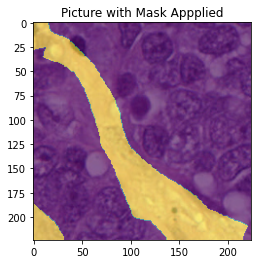

In [5]:
img = Image.open(TRAIN_IMAGE_PATH + train_df['id'][100] + '.png')
mask = Image.open(TRAIN_MASK_PATH + train_df['id'][100] + '.png')
print('Image Size', np.asarray(img).shape)
print('Mask Size', np.asarray(mask).shape)


plt.imshow(img)
plt.imshow(mask, alpha=0.6)
plt.title('Picture with Mask Appplied')
plt.show()

# Loading the Dataset

Define the BCSSDataset for loading the dataset, where each sample comprises an image and its corresponding mask

Build a classs inherit `torch.utils.data.Dataset`.
  
Implement `__init__`, `__getitem__` and `__len__` 3 functions.  

Some operations could be there: setting location of dataset, the method of reading data, label of dataset or transform of dataset.

See [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) for more details

In [6]:
class BCSSDataset(Dataset):
    
    def __init__(self, img_path, mask_path, X, mean, std, transform=None):
        self.img_path = img_path
        self.mask_path = mask_path
        self.X = X
        self.transform = transform
        self.mean = mean
        self.std = std
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        img = cv2.imread(self.img_path + self.X[idx] + '.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.mask_path + self.X[idx] + '.png', cv2.IMREAD_GRAYSCALE)
        
#         if self.transform is not None:
#             aug = self.transform(image=img, mask=mask)
#             img = Image.fromarray(aug['image'])
#             mask = aug['mask']

        
#         if self.transform is None:
#             img = Image.fromarray(img)
        # 将 NumPy 图像转换为 PIL 图像
        img = Image.fromarray(img)
        mask = Image.fromarray(mask)

        # 应用变换
        if self.transform is not None:
            img = self.transform(img)
        else:
            img = T.ToTensor()(img)
    
        # 再次转换为 NumPy
#         img = np.array(img)
        mask = np.array(mask)

        
        t = T.Compose([T.ToTensor(), T.Normalize(self.mean, self.std)])
        img = t(img)
        mask = torch.from_numpy(mask).long()
            
        return img, mask

## Data augmentation 

Data augmentation are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.

PyTorch use `torchvision.transforms` to do data augmentation.
[You can see all function here.](https://pytorch.org/vision/stable/transforms.html)

In [7]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]



# For TRAIN
########################################################################
#  TODO: use transforms.xxx method to do some data augmentation        #
#  This one is for training, find the composition to get better result #
########################################################################
transforms_train = T.Compose([
    T.RandomRotation(10),
    T.RandomHorizontalFlip(),
    T.ColorJitter(brightness=0.2, contrast=0.2)
])
########################################################################
#                           End of your code                           #
########################################################################

# For VAL
########################################################################
#  TODO: use transforms.xxx method to do some data augmentation        #
#  This one is for validate and test,                                  #
#  NOTICE some operation we usually not use in this part               #
########################################################################
transforms_val = T.Compose([])
########################################################################
#                           End of your code                           #
########################################################################

#datasets
train_set = BCSSDataset(TRAIN_IMAGE_PATH, TRAIN_MASK_PATH, X_train, mean, std, transforms_train)
val_set = BCSSDataset(VAL_IMAGE_PATH, VAL_MASK_PATH, X_val, mean, std, transforms_val)

#dataloader
batch_size= 8

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)               

In [8]:
train_set[0]

(tensor([[[-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          ...,
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809]],
 
         [[-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          ...,
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957]],
 
         [[-1.6650, -1.6650, -1.6650,  ..., -1.6650, -1.6650, -1.6650],
          [-1.6650, -1.6650,

# U-net

U-net is a fully convolution neural network for image semantic segmentation. Consist of encoder and decoder parts connected with skip connections. Encoder extract features of different spatial resolution (skip connections) which are used by decoder to define accurate segmentation mask. Use concatenation for fusing decoder blocks with skip connections.


![image](https://hackmd.io/_uploads/rJXtsY_Up.png)

In [9]:
class DoubleConv(nn.Module):
    """
    Block with two convolutional blocks
    """

    def __init__(self, in_channels, out_channels, mid_channels=None):
        """
        Double convolution

        :param in_channels: number of in channels for first conv layer
        :param out_channels: number of out channels for last conv layer
        :param mid_channels: number of out channels for first conv layer
        """
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        ########################################################################
        #  TODO:                                                               #
        #  write model that contains 2 conv layer with batch normalization     #
        #  and relu activation function                                        #
        ########################################################################
        
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
        ########################################################################
        #                           End of your code                           #
        ########################################################################

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """
    Block for down path
    """

    def __init__(self, in_channels, out_channels):
        """
        Down block

        :param in_channels: number of in channels for double conv block
        :param out_channels: number of out channels for double conv block
        """
        super().__init__()
        ########################################################################
        #  TODO:                                                               #
        #  write model which contains pooling and double conv block            #
        ########################################################################
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )
        ########################################################################
        #                           End of your code                           #
        ########################################################################

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """
    Block for up path
    """

    def __init__(self, in_channels, out_channels):
        """
        Down block

        :param in_channels: number of in channels for transpose convolution
        :param out_channels: number of out channels for double conv block
        """
        super().__init__()

        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2): 
        
        #########################################################################################
        # 1. Up-sample the input tensor using transpose convolution                             #
        # 2. Calculate the difference in height and width between x2 and the up-sampled x1      #
        # 3. Pad the up-sampled x1 to match the size of x2                                      #
        # 4. Concatenate x2 and the up-sampled x1 along the channel dimension                   #
        #########################################################################################
        x1 = self.up(x1)

        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])

        x = torch.cat([x2, x1], dim=1)

        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        """
        Final convolution block

        :param in_channels: number of in channels for conv layer
        :param out_channels: number of out channels for conv layer
        """
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        x = self.conv(x)
        return x

In [10]:
class UNet(nn.Module):
    """
    UNet model
    """

    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes

        #############################################################
        #  implement the model according to the UNet architecture   #
        ############################################################# 
        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        self.down4 = Down(512, 1024)
        self.up1 = Up(1024, 512)
        self.up2 = Up(512, 256)
        self.up3 = Up(256, 128)
        self.up4 = Up(128, 64)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits
        #############################################################
        #                   End of your code                        #
        ############################################################# 

In [ ]:
class UNetPlusPlus(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.inc = DoubleConv(n_channels, 64)
        self.down00 = Down(64, 128)
        self.down10 = Down(128, 256)
        self.down20 = Down(256, 512)
        self.outc = OutConv(64, n_classes)
        self.up01 = Up(128, 64)
        self.up11 = Up(256, 128)
        self.up02 = Up(128, 64)
        self.up21 = Up(512, 256)
        self.up12 = Up(256, 128)
        self.up03 = Up(128, 64)
    def forward(self, x):
        x00 = self.inc(x)
        x10 = self.down00(x00)
        x01 = self.up01(x10,x00)
        x20 = self.down10(x10)
        x11 = self.up11(x20,x10)
        x02 = self.up02(x11,x01)
        x30 = self.down20(x20)
        x21 = self.up21(x30,x20)
        x12 = self.up12(x21,x11)
        x03 = self.up03(x12,x02)
        logits = self.outc(x03)
        return logits



In [11]:
#model = UNet(n_channels=3, n_classes=3)
model = UNetPlusPlus(n_channels=3, n_classes=3)

In [12]:
model

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-05, moment

# Training

In this section, you will implement some functions in your training loop. There are several crucial functions you need to implement:

- Pixel Accuracy: Pixel Accuracy measures the percentage of correctly predicted pixels out of the total pixels in the image

- mIoU (Mean Intersection over Union): mIoU evaluates the spatial overlap between the predicted and ground truth segmentation masks for multiple classes.

- Dice Loss: Dice Loss quantifies the dissimilarity between the predicted and ground truth masks, emphasizing the agreement between the two masks

Try to use labeled data design and train a segmentor (Unet) from scratch to predict the mask of a breast cancer lesions image. 

In [13]:
def pixel_accuracy(output, mask):
    with torch.no_grad():
        #############################################################################################################
        #  1. Convert the output to class predictions using argmax after applying softmax                           # 
        #  2. Create a tensor of binary values indicating correct predictions                                       #
        #  3. Calculate accuracy by dividing the number of correct predictions by the total number of predictions   #
        #############################################################################################################
        prob = F.softmax(output, dim=1)
        class_pred = torch.argmax(prob, dim=1)
        correct_pred = class_pred.eq(mask).float()
        accuracy = correct_pred.sum() / mask.numel()
        #############################################################################################################
        #                                      End of your code                                                     #
        #############################################################################################################
    return accuracy

## mIoU

mean Intersection over Union (mIoU), a metric used to evaluate the performance of a segmentation model. It takes predicted masks and ground truth masks as input, computes the IoU for each class, and returns the average IoU across all classes. 

![image](https://hackmd.io/_uploads/SkLIbhFL6.png)

In [14]:
def mIoU(pred_mask, mask, smooth=1e-10, n_classes=3):
    with torch.no_grad():
        pred_mask = F.softmax(pred_mask, dim=1)
        pred_mask = torch.argmax(pred_mask, dim=1)
        pred_mask = pred_mask.contiguous().view(-1)
        mask = mask.contiguous().view(-1)

        iou_per_class = []
        for clas in range(0, n_classes): #loop per pixel class
            true_class = pred_mask == clas
            true_label = mask == clas

            if true_label.long().sum().item() == 0: #no exist label in this loop
                iou_per_class.append(np.nan)
            else:

                #############################################################################################################
                #  Calculate the intersection of the true positive pixels for the current class                             # 
                #  Calculate the union of the true positive and false negative pixels for the current class                 #
                #############################################################################################################
                intersect = (true_class & true_label).long().sum().item()
                union = (true_class | true_label).long().sum().item()
                #############################################################################################################
                #                                      End of your code                                                     #
                #############################################################################################################
                iou = (intersect + smooth) / (union +smooth)
                iou_per_class.append(iou)
        return np.nanmean(iou_per_class)

## Dice Loss

Dice loss is based on Sørensen-Dice coefficient. It measures the overlap between the predicted and target segmentation masks. Dice loss provides a differentiable and smooth measure of segmentation accuracy.

${DiceLoss}(y, \bar p) = 1 - \cfrac{(2y\bar p + \epsilon)}{(y + \bar p + \epsilon)}$ 

- $y$ represents the ground truth mask.
- $\bar p$ represents the predicted mask.
- $\epsilon$ is a small constant added for numerical stability.

In [15]:
class DiceLoss(nn.Module):
    """
    Dice loss
    """

    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, eps=1e-6):
        """
        Calculation of dice loss

        :param inputs: model predictions
        :param targets: target values
        :param eps: stability factor, defaults to 1e-6
        :return: loss value
        """
        # 
        #######################################
        #        implement dice loss          #                                                                      
        #######################################
        num_classes = inputs.shape[1]

        # 将 targets 转换为 one-hot 编码格式
        targets_one_hot = torch.eye(num_classes)[targets.squeeze(1)]
        targets_one_hot = targets_one_hot.permute(0, 3, 1, 2).to(inputs.device).float()

        # 计算交集和并集
        intersection = (inputs * targets_one_hot).sum(dim=(2, 3))
        union = (inputs + targets_one_hot).sum(dim=(2, 3))

        # 计算 Dice 系数
        dice_score = (2. * intersection + eps) / (union + eps)
        dice_loss = 1 - dice_score.mean(dim=1)
        #######################################
        #          End of your code           #                              
        #######################################
        return dice_loss.mean()

# Training loop

Call train function in a loop.  
Take a break and wait.

In [16]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit(epochs, model, train_loader, val_loader, criterion1, criterion2, optimizer, scheduler, patch=False):
    torch.cuda.empty_cache()
    train_losses = []
    test_losses = []
    val_iou = []; val_acc = []
    train_iou = []; train_acc = []
    lrs = []
    min_loss = np.inf
    decrease = 1 ; not_improve=0

    model.to(device)
    fit_time = time.time()
    for e in range(epochs):
        since = time.time()
        running_loss = 0
        iou_score = 0
        accuracy = 0
        #training loop
        model.train()
        for i, data in enumerate(tqdm(train_loader)):
            #training phase
            ########################################################################
            # TODO: Forward, backward and optimize                                 #
            # 1. process input through the network                                 #
            # 2. compute the two losses                                            #
            # 3. caluate mIoU and piexl accuracy                                   #
            # 4. propagate gradients back into the network’s parameters            #
            # 5. update the weights of the network                                 #
            # 6. reset gradient                                                    #
            ########################################################################
            image, mask = data
            
            image = image.to(device) 
            mask = mask.to(device)
            output = model(image)
            loss = criterion1(output, mask) + criterion2(output, mask)
            iou_score += mIoU(output, mask)
            accuracy += pixel_accuracy(output, mask)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            ########################################################################
            #                           End of your code                           #
            ########################################################################
            #step the learning rate
            lrs.append(get_lr(optimizer))
            scheduler.step() 
            
            running_loss += loss.item()
            
        else:
            model.eval()
            test_loss = 0
            test_accuracy = 0
            val_iou_score = 0
            #validation loop
            with torch.no_grad():
                for i, data in enumerate(tqdm(val_loader)):
                    ########################################################################
                    # TODO: Forward, backward and optimize                                 #
                    # 1. process input through the network                                 #
                    # 2. compute the two losses                                            #
                    # 3. caluate mIoU and piexl accuracy                                   #
                    # 4. save this batch's loss into test_loss                             #
                    ########################################################################
                    image, mask = data
                    
                    image = image.to(device)
                    mask = mask.to(device)
                    output = model(image)
                    val_iou_score += mIoU(output, mask)
                    test_accuracy += pixel_accuracy(output, mask)
                    loss = criterion1(output, mask) + criterion2(output, mask)                                 
                    test_loss += loss.item()
                    ########################################################################
                    #                           End of your code                           #
                    ########################################################################
            
            #calculatio mean for each batch
            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(val_loader))


            if min_loss > (test_loss/len(val_loader)):
                print('Loss Decreasing.. {:.3f} >> {:.3f} '.format(min_loss, (test_loss/len(val_loader))))
                min_loss = (test_loss/len(val_loader))
                decrease += 1
                if decrease % 5 == 0:
                    print('saving model...')
                    torch.save(model, 'Unet-Mobilenet_v2_mIoU-{:.3f}.pt'.format(val_iou_score/len(val_loader)))
                    

            if (test_loss/len(val_loader)) > min_loss:
                not_improve += 1
                min_loss = (test_loss/len(val_loader))
                print(f'Loss Not Decrease for {not_improve} time')
                if not_improve == 7:
                    print('Loss not decrease for 7 times, Stop Training')
                    break
            
            #iou
            val_iou.append(val_iou_score/len(val_loader))
            train_iou.append(iou_score/len(train_loader))
            train_acc.append(accuracy/len(train_loader))
            val_acc.append(test_accuracy/ len(val_loader))
            print("Epoch:{}/{}..".format(e+1, epochs),
                  "Train Loss: {:.3f}..".format(running_loss/len(train_loader)),
                  "Val Loss: {:.3f}..".format(test_loss/len(val_loader)),
                  "Train mIoU:{:.3f}..".format(iou_score/len(train_loader)),
                  "Val mIoU: {:.3f}..".format(val_iou_score/len(val_loader)),
                  "Train Acc:{:.3f}..".format(accuracy/len(train_loader)),
                  "Val Acc:{:.3f}..".format(test_accuracy/len(val_loader)),
                  "Time: {:.2f}m".format((time.time()-since)/60))
        
    history = {'train_loss' : train_losses, 'val_loss': test_losses,
               'train_miou' :train_iou, 'val_miou':val_iou,
               'train_acc' :train_acc, 'val_acc':val_acc,
               'lrs': lrs}
    print('Total time: {:.2f} m' .format((time.time()- fit_time)/60))
    return history

In [20]:
################################################################################
#     You can adjust those hyper parameters to loop for max_epochs times       #
################################################################################
max_lr = 1e-3
epoch = 10
weight_decay = 1e-4

criterion1 = nn.CrossEntropyLoss()
criterion2 = DiceLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=max_lr, weight_decay=weight_decay)
sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epoch,
                                            steps_per_epoch=len(train_loader))

history = fit(epoch, model, train_loader, val_loader, criterion1, criterion2, optimizer, sched)
################################################################################
#                               End of your code                               #
################################################################################

  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Loss Decreasing.. inf >> 1.990 
Epoch:1/10.. Train Loss: 1.945.. Val Loss: 1.990.. Train mIoU:0.197.. Val mIoU: 0.171.. Train Acc:0.352.. Val Acc:0.346.. Time: 15.84m


  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Loss Decreasing.. 1.990 >> 1.897 
Epoch:2/10.. Train Loss: 1.907.. Val Loss: 1.897.. Train mIoU:0.156.. Val mIoU: 0.168.. Train Acc:0.333.. Val Acc:0.346.. Time: 10.88m


  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Loss Decreasing.. 1.897 >> 1.740 
Epoch:3/10.. Train Loss: 1.830.. Val Loss: 1.740.. Train mIoU:0.170.. Val mIoU: 0.218.. Train Acc:0.336.. Val Acc:0.381.. Time: 10.90m


  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Loss Decreasing.. 1.740 >> 1.450 
saving model...
Epoch:4/10.. Train Loss: 1.614.. Val Loss: 1.450.. Train mIoU:0.290.. Val mIoU: 0.359.. Train Acc:0.456.. Val Acc:0.565.. Time: 10.84m


  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Loss Decreasing.. 1.450 >> 1.286 
Epoch:5/10.. Train Loss: 1.422.. Val Loss: 1.286.. Train mIoU:0.353.. Val mIoU: 0.416.. Train Acc:0.539.. Val Acc:0.602.. Time: 10.79m


  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Loss Decreasing.. 1.286 >> 1.192 
Epoch:6/10.. Train Loss: 1.333.. Val Loss: 1.192.. Train mIoU:0.371.. Val mIoU: 0.443.. Train Acc:0.560.. Val Acc:0.633.. Time: 10.86m


  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Loss Decreasing.. 1.192 >> 1.170 
Epoch:7/10.. Train Loss: 1.275.. Val Loss: 1.170.. Train mIoU:0.387.. Val mIoU: 0.451.. Train Acc:0.581.. Val Acc:0.647.. Time: 10.88m


  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Loss Decreasing.. 1.170 >> 1.104 
Epoch:8/10.. Train Loss: 1.226.. Val Loss: 1.104.. Train mIoU:0.421.. Val mIoU: 0.491.. Train Acc:0.613.. Val Acc:0.687.. Time: 10.78m


  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Loss Decreasing.. 1.104 >> 1.078 
saving model...
Epoch:9/10.. Train Loss: 1.181.. Val Loss: 1.078.. Train mIoU:0.457.. Val mIoU: 0.521.. Train Acc:0.644.. Val Acc:0.708.. Time: 10.84m


  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Loss Decreasing.. 1.078 >> 1.074 
Epoch:10/10.. Train Loss: 1.164.. Val Loss: 1.074.. Train mIoU:0.466.. Val mIoU: 0.528.. Train Acc:0.654.. Val Acc:0.713.. Time: 10.90m
Total time: 113.52 m


In [21]:
torch.save(model, 'Unet-Resnet.pt')

#### Visualize accuracy and loss

In [26]:
def plot_loss(history):
    plt.plot(history['val_loss'], label='val', marker='o')
    plt.plot( history['train_loss'], label='train', marker='o')
    plt.title('Loss per epoch'); plt.ylabel('loss');
    plt.xlabel('epoch')
    plt.legend(), plt.grid()
    plt.show()
    
def plot_score(history):
    plt.plot(history['train_miou'], label='train_mIoU', marker='*')
    plt.plot(history['val_miou'], label='val_mIoU',  marker='*')
    plt.title('Score per epoch'); plt.ylabel('mean IoU')
    plt.xlabel('epoch')
    plt.legend(), plt.grid()
    plt.show()
    
def plot_acc(history):
    plt.plot([x.cpu() for x in history['train_acc']], label='train_accuracy', marker='*') # i change .cpu()
    plt.plot([x.cpu() for x in history['val_acc']], label='val_accuracy',  marker='*')
    plt.title('Accuracy per epoch'); plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(), plt.grid()
    plt.show()

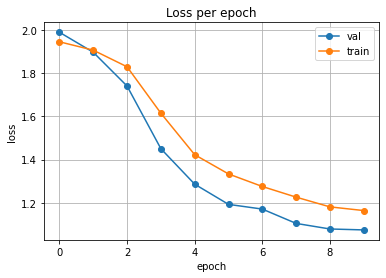

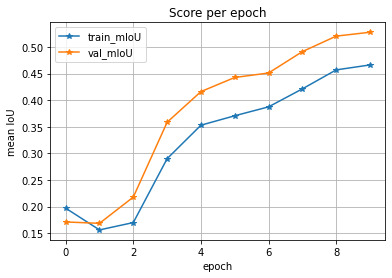

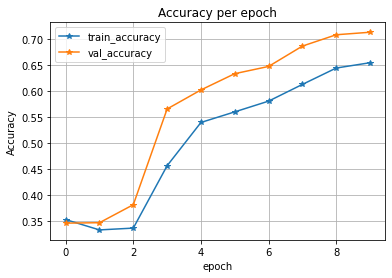

In [27]:
plot_loss(history)
plot_score(history)
plot_acc(history)

## Predict Result

預測`test`並將結果上傳至[**Kaggle**](https://www.kaggle.com/t/13040d09b42940ba90f96cca324ee90d)

執行完畢此區的程式碼後，會將`test`預測完的結果存下來。

上傳流程
1. 點選左側選單最下方的資料夾圖示
2. 右鍵「output.csv」
3. 點選「Download」
4. 至連結網頁點選「Submit Predictions」
5. 將剛剛下載的檔案上傳
6. 系統會計算並公布其中50%資料的正確率

In [18]:
TEST_IMAGE_PATH = './BCSS/test/'

In [19]:
test_df = create_df(TEST_IMAGE_PATH)

In [20]:
X_test = test_df['id'].to_numpy()

In [21]:
model = torch.load('Unet-Resnet.pt')
#model = torch.load('Unet-Mobilenet_v2_mIoU-0.521.pt')

In [22]:
class BCSSTestDataset(Dataset):
    
    def __init__(self, img_path, X, transform=None):
        self.img_path = img_path
        self.X = X
        self.transform = transform
      
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        img = cv2.imread(self.img_path + self.X[idx] + '.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        if self.transform is not None:
            aug = self.transform(image=img, mask=mask)
            img = Image.fromarray(aug['image'])
        
        if self.transform is None:
            img = Image.fromarray(img)
#         img = Image.fromarray(img)
#         # 应用变换
#         if self.transform is not None:
#             img = self.transform(img)
#         else:
#             img = T.ToTensor()(img)
            

        
        return img

test_set = BCSSTestDataset(TEST_IMAGE_PATH, X_test)
print(len(test_set))

4021


In [23]:
def predict_image(model, image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    model.eval()
    t = T.Compose([T.ToTensor(), T.Normalize(mean, std)])
    image = t(image)
    model.to(device); image=image.to(device)
    with torch.no_grad():
        
        image = image.unsqueeze(0)
        
        output = model(image)
        masked = torch.argmax(output, dim=1)
        masked = masked.cpu().squeeze(0)
    return masked

In [24]:
import pandas as pd
from tqdm import tqdm

data = []

for i in tqdm(range(len(test_set))):
    img = test_set[i]
    pred_mask = predict_image(model, img)
    index = i 

    data.append({'index': index, 'pred_mask': pred_mask.numpy().tolist()})

df = pd.DataFrame(data)

df.to_csv('output.csv', index=False)

100%|██████████| 4021/4021 [01:51<00:00, 35.99it/s]
